In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#mit command option shift p und open active bekommt man seperate window

# Load Data 

In [2]:
df=pd.read_csv("relationship_advise_comments_17.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")

Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 315


# General EDA

In [3]:
df.head()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
0,khmer703,NaN,NaN,"Honestly, part of me wants to give the guy the...",True,0,1509494462,NaN,1509494893,0,...,1511998534,2,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
1,[deleted],NaN,NaN,[deleted],True,0,1509494504,NaN,1510157024,0,...,1511998552,1,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
2,biased_milk_hotel,NaN,NaN,I dislike big age-gaps because I think someone...,True,0,1509494510,NaN,False,0,...,1511998554,1,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
3,Boppyboy207,NaN,NaN,I think you should bring up your concerns.\nSi...,True,0,1509494515,NaN,False,0,...,1511998557,2,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
4,Smallbuteffective86,NaN,NaN,This is why some 31 year old men insist on dat...,True,0,1509494517,NaN,False,0,...,1511998558,2,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
66193,somedayallourdreams,NaN,NaN,"Hey. Thanks for your input, I appreciate it. A...",True,0,1512086288,NaN,False,0,...,1513179465,1,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
66194,cookmybook,NaN,NaN,"These days, with dating apps and the easy natu...",True,0,1512086302,NaN,False,0,...,1513179472,12,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
66195,outdatedopinion,NaN,NaN,"&gt; But, if he felt he needed to go (he wante...",True,0,1512086377,NaN,False,0,...,1513179511,2,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
66196,Philomath1313,NaN,NaN,"This sounds like an absolutely untenable, cont...",True,0,1512086387,NaN,1512086747,0,...,1513179515,1,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN
66197,New1new1,NaN,NaN,"They might be thinking ""if you take her home a...",True,0,1512086398,NaN,False,0,...,1513179520,0,False,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66198 entries, 0 to 66197
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   author                  66198 non-null  object 
 1   author_flair_css_class  0 non-null      float64
 2   author_flair_text       0 non-null      float64
 3   body                    66180 non-null  object 
 4   can_gild                66198 non-null  bool   
 5   controversiality        66198 non-null  int64  
 6   created_utc             66198 non-null  int64  
 7   distinguished           93 non-null     object 
 8   edited                  66198 non-null  object 
 9   gilded                  66198 non-null  int64  
 10  id                      66198 non-null  object 
 11  is_submitter            66198 non-null  bool   
 12  link_id                 66198 non-null  object 
 13  parent_id               66198 non-null  object 
 14  permalink               66198 non-null

In [6]:
df.isnull().sum() 

author                        0
author_flair_css_class    66198
author_flair_text         66198
body                         18
can_gild                      0
controversiality              0
created_utc                   0
distinguished             66105
edited                        0
gilded                        0
id                            0
is_submitter                  0
link_id                       0
parent_id                     0
permalink                     0
retrieved_on                  0
score                         0
stickied                      0
subreddit                     0
subreddit_id                  0
subreddit_type                0
author_cakeday            66086
mod_note                  66198
mod_reason_by             66198
mod_reason_title          66198
dtype: int64

In [7]:
df.describe()

,author_flair_css_class,author_flair_text,controversiality,created_utc,gilded,retrieved_on,score,mod_note,mod_reason_by,mod_reason_title
count,0.0,0.0,66198.000000,6.619800e+04,66198.000000,6.619800e+04,66198.000000,0.0,0.0,0.0
mean,NaN,NaN,0.013596,1.510804e+09,0.000076,1.512648e+09,4.043219,NaN,NaN,NaN
std,NaN,NaN,0.115806,7.595668e+05,0.008691,3.450740e+05,23.506655,NaN,NaN,NaN
min,NaN,NaN,0.000000,1.509494e+09,0.000000,1.511999e+09,-199.000000,NaN,NaN,NaN
25%,NaN,NaN,0.000000,1.510157e+09,0.000000,1.512431e+09,1.000000,NaN,NaN,NaN
50%,NaN,NaN,0.000000,1.510789e+09,0.000000,1.512687e+09,1.000000,NaN,NaN,NaN
75%,NaN,NaN,0.000000,1.511452e+09,0.000000,1.512932e+09,3.000000,NaN,NaN,NaN
max,NaN,NaN,1.000000,1.512086e+09,1.000000,1.513180e+09,1878.000000,NaN,NaN,NaN


In [8]:
df.columns

Index(['author', 'author_flair_css_class', 'author_flair_text', 'body',
       'can_gild', 'controversiality', 'created_utc', 'distinguished',
       'edited', 'gilded', 'id', 'is_submitter', 'link_id', 'parent_id',
       'permalink', 'retrieved_on', 'score', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_type', 'author_cakeday', 'mod_note',
       'mod_reason_by', 'mod_reason_title'],
      dtype='object')

# One Feature EDA

# Controversialty

0    65298
1      900
Name: controversiality, dtype: int64


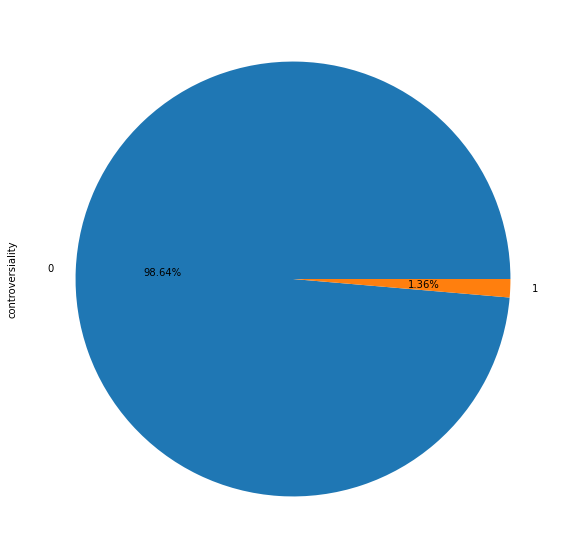

In [9]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Converting Controversialty values and deleting unimportant rows

In [10]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace(0,'0')

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace(1,'1')

In [11]:
df[df['controversiality'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


In [12]:
df["controversiality"].unique()

array(['0', '1'], dtype=object)

0    65298
1      900
Name: controversiality, dtype: int64


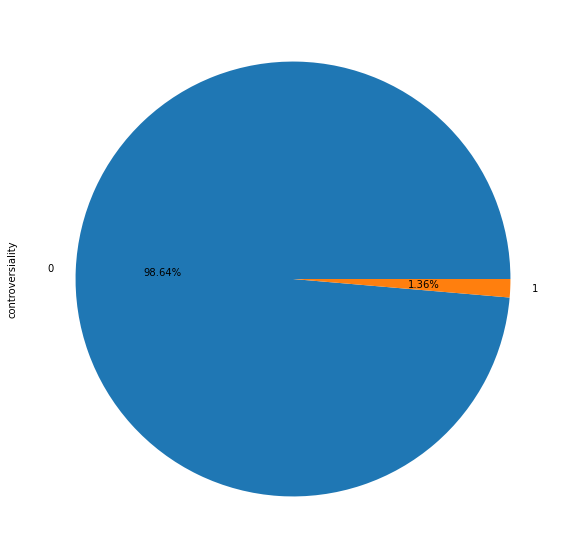

In [13]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

False    66128
True        70
Name: stickied, dtype: int64


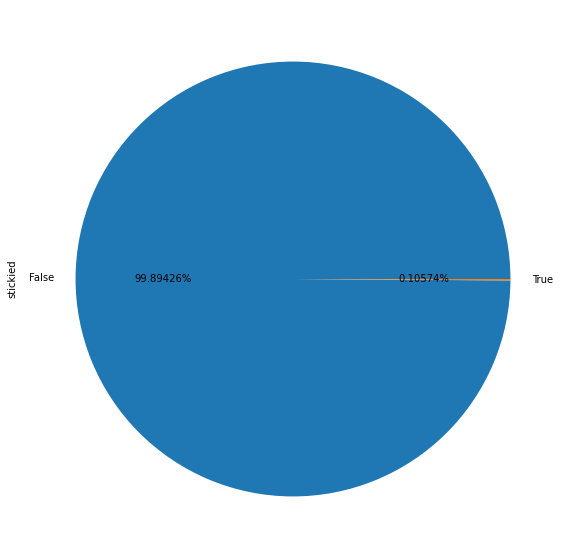

In [14]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [15]:
df["stickied"].unique()

array([False,  True])

In [16]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")

In [17]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    66128
1       70
Name: stickied, dtype: int64


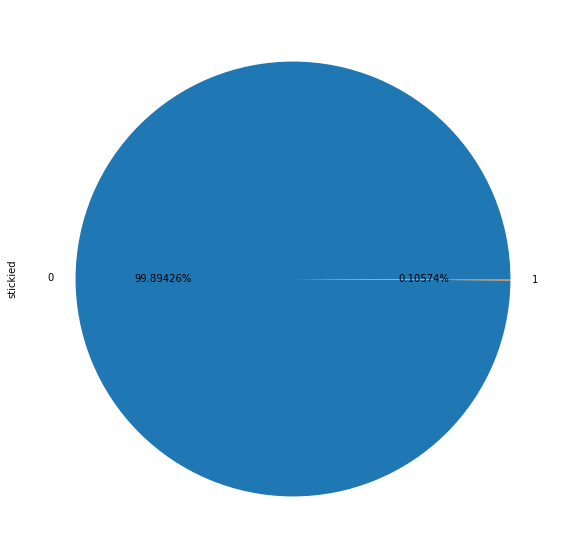

In [18]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

In [19]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

# Link_id

t3_7fhzsn    633
t3_7fwkdk    364
t3_7akbbz    344
t3_7ctdhc    342
t3_7dnodm    284
            ... 
t3_7bj9s7      1
t3_7bjbfu      1
t3_7bjlh4      1
t3_6wqon0      1
t3_7gqr3d      1
Name: link_id, Length: 8107, dtype: int64


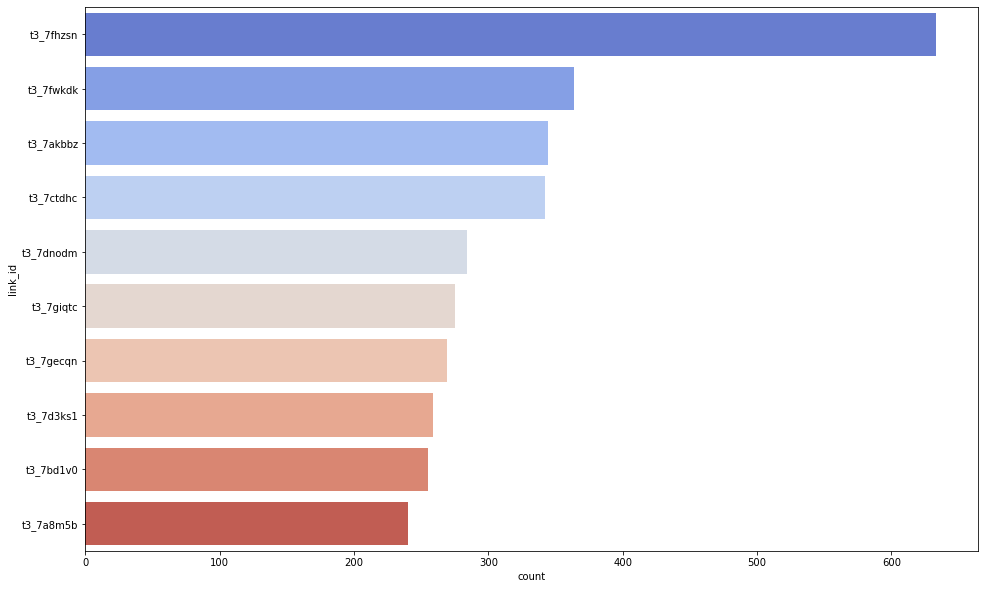

In [20]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [21]:
df[df['link_id'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Subreddit_id

t5_2r0cn    66198
Name: subreddit_id, dtype: int64


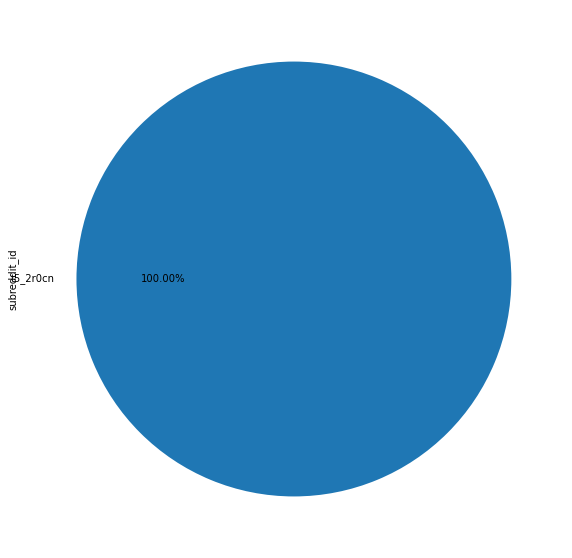

In [22]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 

In [23]:
df[df['subreddit_id'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Author

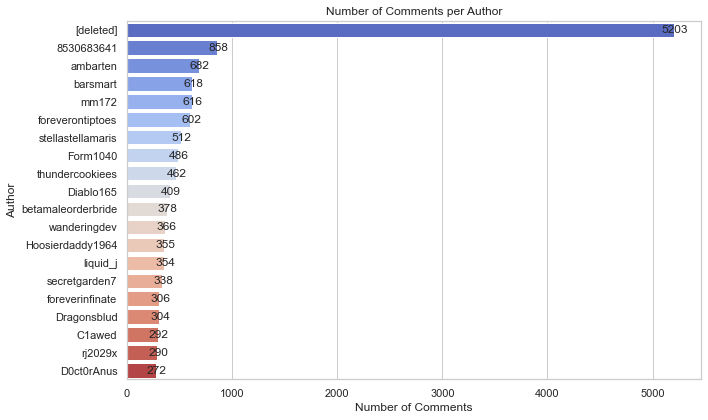

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [25]:
 df[df['author'].str.contains('AutoModerator')]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title
47915,AutoModerator,NaN,NaN,"fak u gooby\n\n*I am a bot, and this action wa...",True,0,1511367529,moderator,False,0,...,1512902365,6,0,relationship_advice,t5_2r0cn,public,NaN,NaN,NaN,NaN


# Alle Automoderatoren löschen

In [26]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

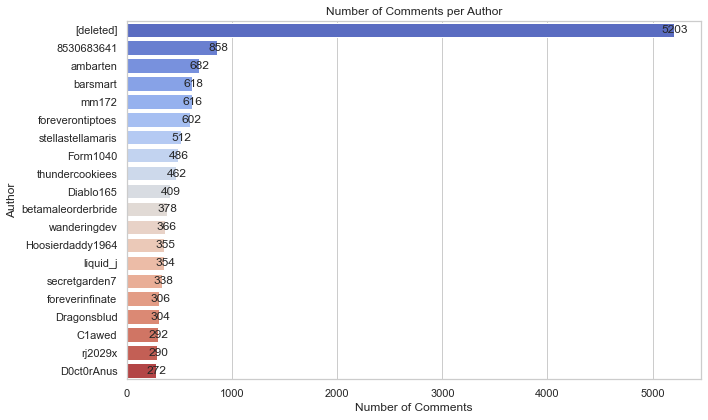

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

# Author flair text

In [28]:
df['author_flair_text'].fillna('0', inplace=True)

0    66197
Name: author_flair_text, dtype: int64


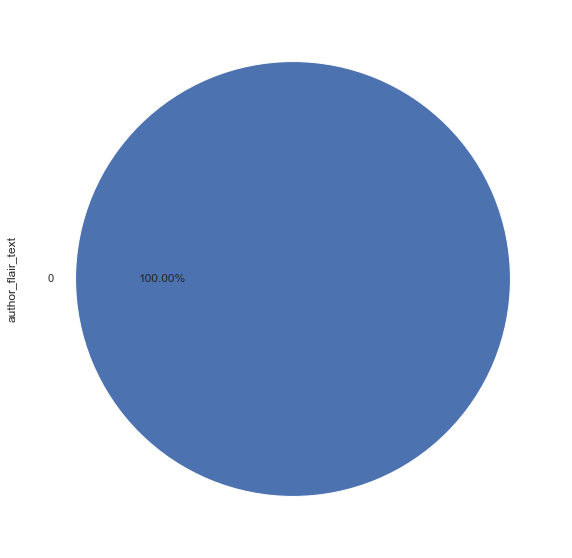

In [29]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationship_advice    66197
Name: subreddit, dtype: int64


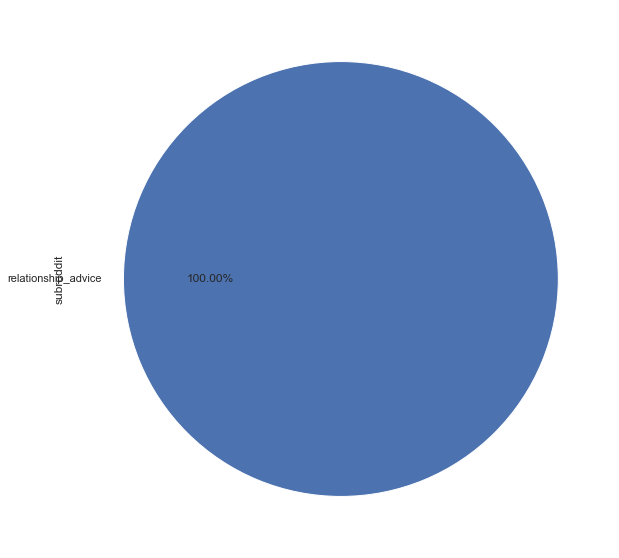

In [30]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [31]:
df[df['subreddit'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Created_ utc

In [32]:
df['created_utc'] = pd.to_datetime(df['created_utc'], unit='s')

In [33]:
df['created_utc']

0       2017-11-01 00:01:02
1       2017-11-01 00:01:44
2       2017-11-01 00:01:50
3       2017-11-01 00:01:55
4       2017-11-01 00:01:57
                ...        
66193   2017-11-30 23:58:08
66194   2017-11-30 23:58:22
66195   2017-11-30 23:59:37
66196   2017-11-30 23:59:47
66197   2017-11-30 23:59:58
Name: created_utc, Length: 66197, dtype: datetime64[ns]

In [34]:
df[df['created_utc'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,retrieved_on,score,stickied,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title


# Hours

Text(0, 0.5, 'Anzahl der Kommentare')

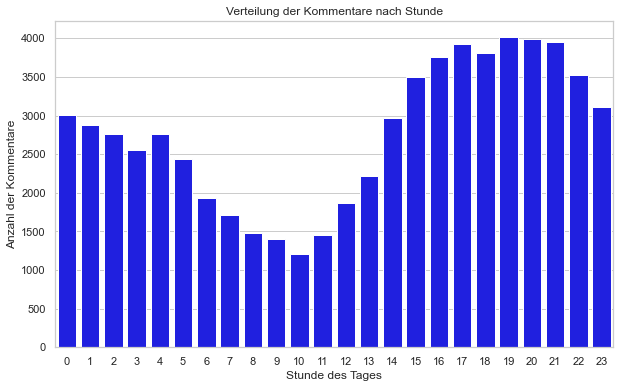

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

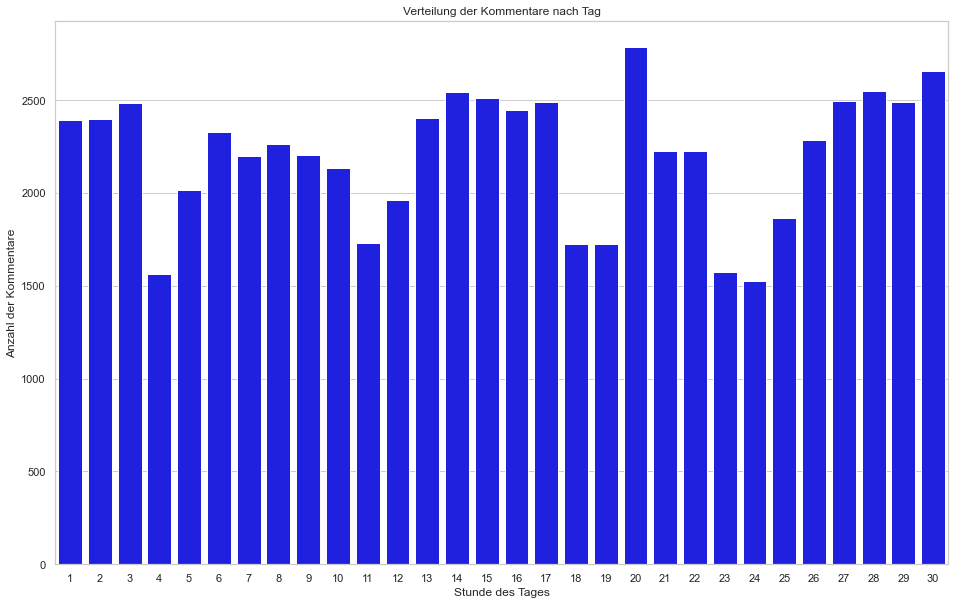

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

In [37]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [38]:
df['created_year'].unique()

array([2017])

# Gilded

0    66192
1        5
Name: gilded, dtype: int64


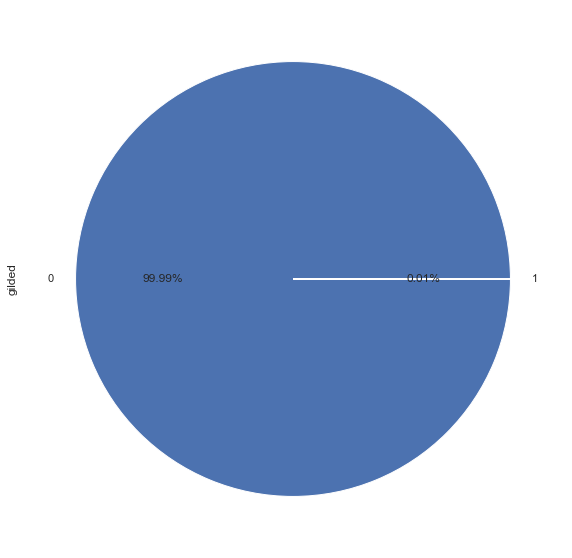

In [39]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [40]:
df["gilded"].unique()

array([0, 1])

In [41]:
df["gilded"] = df["gilded"].replace(0,"0")
df["gilded"] = df["gilded"].replace(1, "1")

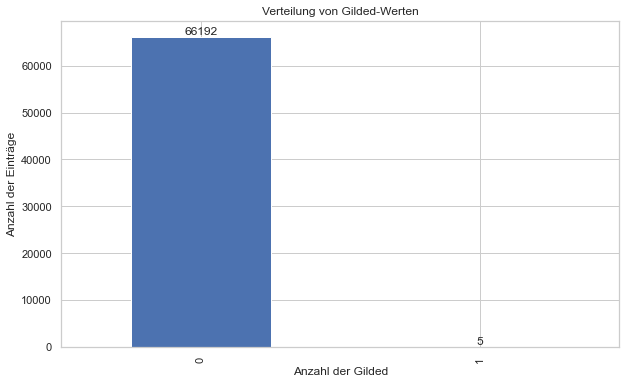

In [42]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

In [44]:
df['distinguished'].fillna('0', inplace=True)

0            66105
moderator       92
Name: distinguished, dtype: int64


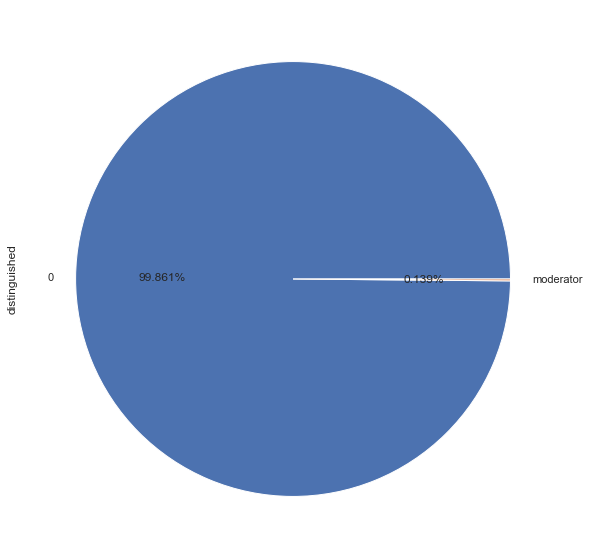

In [45]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

In [46]:
df["distinguished"].unique()

array(['0', 'moderator'], dtype=object)

In [47]:
 df[df['distinguished'].str.contains('moderator')]["body"]

6790     We've removed your post, for the following rea...
6797     We've removed your post, for the following rea...
10612    Your account is shadowbanned which means any c...
10616    Your account is shadowbanned which means any c...
13047    We've removed your post, for the following rea...
                               ...                        
61626    We've removed your post for the following **re...
61627    We've removed your post for the following **re...
62968    Very sorry but we've removed your post for the...
63260    We've removed your post for the following **re...
65823    **Your account is shadowbanned** which means a...
Name: body, Length: 92, dtype: object

In [48]:
import re
indices_to_remove =[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,67,68,69,70,71,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91] 
report_bot=df[df['distinguished'].str.contains('moderator')]
# Abrufen der Indexwerte der Zeilen in bot_in_body_rows, die gelöscht werden sollen
indices_to_delete = report_bot.iloc[indices_to_remove].index
df.drop(indices_to_delete, inplace=True)


In [49]:
 df[df['distinguished'].str.contains('moderator')]["body"]

13058    This does not fit our rules but I'm leaving it...
32844    Please stop telling people "fuck off", "suck m...
47914    Thank you for your report. We understand your ...
56193    &gt; we realized it was for the best if we did...
56271    Hey there. Sorry to be a butthead but both due...
Name: body, dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66110 entries, 0 to 66197
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   author                  66110 non-null  object        
 1   author_flair_css_class  0 non-null      float64       
 2   author_flair_text       66110 non-null  object        
 3   body                    66092 non-null  object        
 4   can_gild                66110 non-null  bool          
 5   controversiality        66110 non-null  object        
 6   created_utc             66110 non-null  datetime64[ns]
 7   distinguished           66110 non-null  object        
 8   edited                  66110 non-null  object        
 9   gilded                  66110 non-null  object        
 10  id                      66110 non-null  object        
 11  is_submitter            66110 non-null  bool          
 12  link_id                 66110 non-null  object

# Edited

In [51]:
df["edited"].unique()

array(['1509494893', '1510157024', 'False', ..., '1512755697',
       '1512086283', '1512086747'], dtype=object)

In [52]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")


In [53]:
df["edited"].unique()

array(['1', '0'], dtype=object)

0    64053
1     2057
Name: edited, dtype: int64


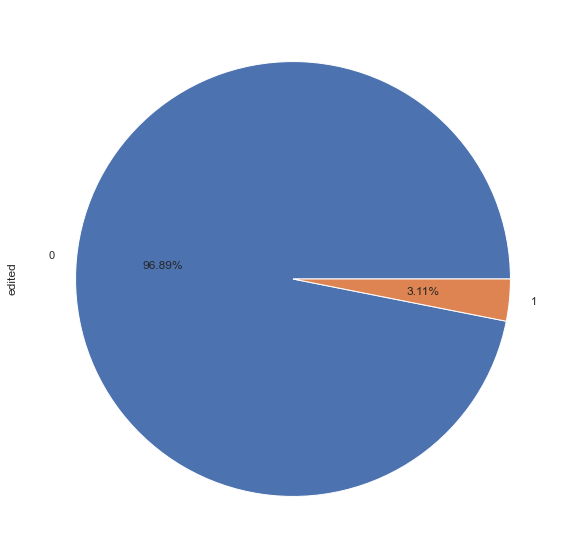

In [54]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [55]:
df[df['edited'].isna()]

,author,author_flair_css_class,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,...,subreddit,subreddit_id,subreddit_type,author_cakeday,mod_note,mod_reason_by,mod_reason_title,created_hour,created_day,created_year


# Score

In [56]:
df["score"].value_counts()

 1      29801
 2      13292
 3       6278
 0       2628
 4       2149
        ...  
-83         1
-50         1
 149        1
 265        1
 157        1
Name: score, Length: 334, dtype: int64

In [57]:
df['score'] = df["score"].astype(int)

In [58]:
df["score"].mean()

4.044304946301619

In [59]:
df.describe()

,author_flair_css_class,retrieved_on,score,mod_note,mod_reason_by,mod_reason_title,created_hour,created_day,created_year
count,0.0,6.611000e+04,66110.000000,0.0,0.0,0.0,66110.000000,66110.000000,66110.0
mean,NaN,1.512648e+09,4.044305,NaN,NaN,NaN,12.744759,15.601709,2017.0
std,NaN,3.451528e+05,23.511630,NaN,NaN,NaN,7.289238,8.783983,0.0
min,NaN,1.511999e+09,-199.000000,NaN,NaN,NaN,0.000000,1.000000,2017.0
25%,NaN,1.512430e+09,1.000000,NaN,NaN,NaN,6.000000,8.000000,2017.0
50%,NaN,1.512687e+09,1.000000,NaN,NaN,NaN,15.000000,15.000000,2017.0
75%,NaN,1.512932e+09,3.000000,NaN,NaN,NaN,19.000000,23.000000,2017.0
max,NaN,1.513180e+09,1878.000000,NaN,NaN,NaN,23.000000,30.000000,2017.0


In [60]:
df.isnull().sum() 

author                        0
author_flair_css_class    66110
author_flair_text             0
body                         18
can_gild                      0
controversiality              0
created_utc                   0
distinguished                 0
edited                        0
gilded                        0
id                            0
is_submitter                  0
link_id                       0
parent_id                     0
permalink                     0
retrieved_on                  0
score                         0
stickied                      0
subreddit                     0
subreddit_id                  0
subreddit_type                0
author_cakeday            65998
mod_note                  66110
mod_reason_by             66110
mod_reason_title          66110
created_hour                  0
created_day                   0
created_year                  0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66110 entries, 0 to 66197
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   author                  66110 non-null  object        
 1   author_flair_css_class  0 non-null      float64       
 2   author_flair_text       66110 non-null  object        
 3   body                    66092 non-null  object        
 4   can_gild                66110 non-null  bool          
 5   controversiality        66110 non-null  object        
 6   created_utc             66110 non-null  datetime64[ns]
 7   distinguished           66110 non-null  object        
 8   edited                  66110 non-null  object        
 9   gilded                  66110 non-null  object        
 10  id                      66110 non-null  object        
 11  is_submitter            66110 non-null  bool          
 12  link_id                 66110 non-null  object

# Two Feature Analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

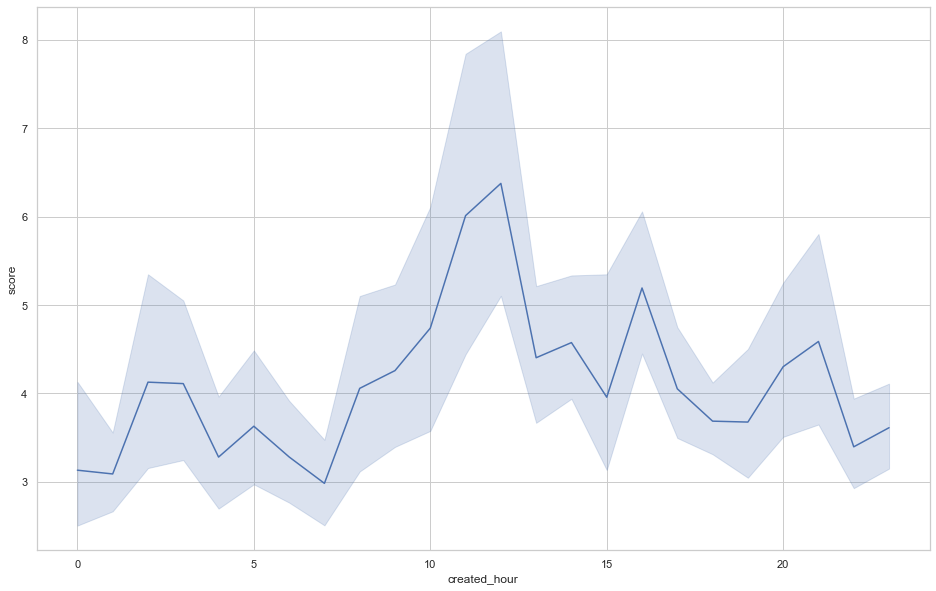

In [62]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

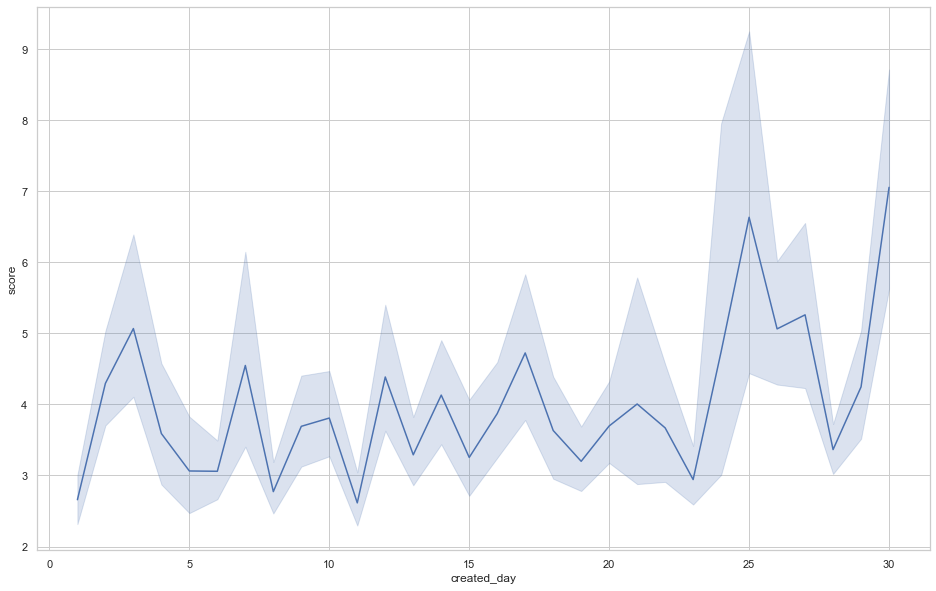

In [63]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

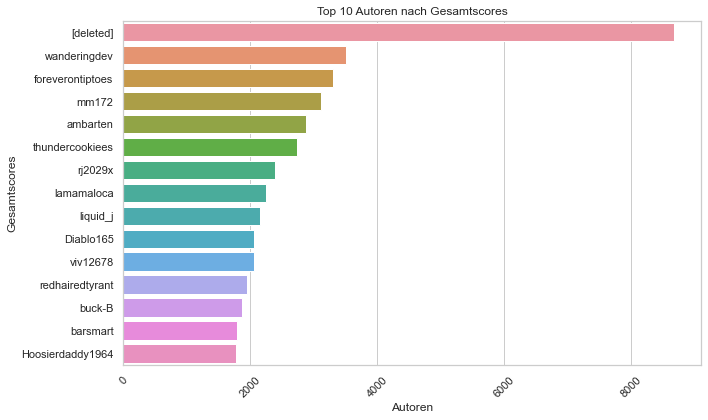

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()

# Ohne Deleted

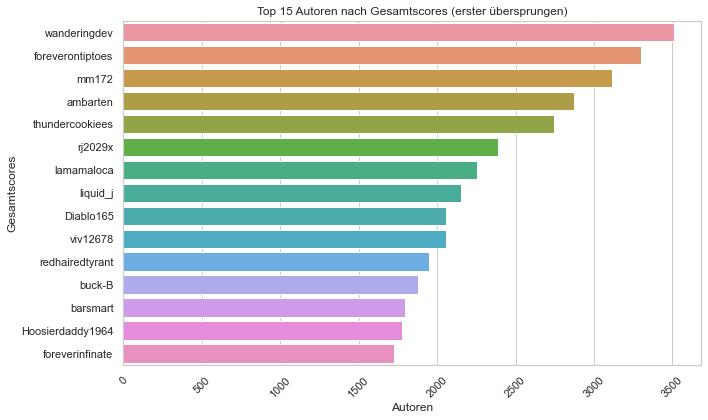

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Column removing

In [66]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id","is_submitter","subreddit_type","author_cakeday","mod_note","mod_reason_by","mod_reason_title","permalink"], axis = 1)

In [67]:
df.isnull().sum() 

author                0
author_flair_text     0
body                 18
can_gild              0
controversiality      0
created_utc           0
distinguished         0
edited                0
gilded                0
id                    0
link_id               0
parent_id             0
score                 0
stickied              0
created_hour          0
created_day           0
created_year          0
dtype: int64

# Row Deleting

# Delete all comments that have a NA

In [68]:
df[pd.isna(df['body'])]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
13095,amazoncrossdressthro,0,NaN,True,0,2017-11-06 23:24:21,0,1,0,dpg653g,t3_7b8z8c,t1_dpg5yk5,1,0,23,6,2017
13113,amazoncrossdressthro,0,NaN,True,0,2017-11-06 23:30:36,0,1,0,dpg6gv7,t3_7b8z8c,t1_dpg5yk5,1,0,23,6,2017
13192,amazoncrossdressthro,0,NaN,True,0,2017-11-07 00:04:18,0,1,0,dpg86i4,t3_7b8z8c,t1_dpg6msa,1,0,0,7,2017
19140,Colorfulthoughtsxx,0,NaN,True,0,2017-11-09 19:40:21,0,1,0,dpl44nc,t3_7buwa9,t1_dpl3ecy,1,0,19,9,2017
34366,TradSkull,0,NaN,True,0,2017-11-16 15:28:43,0,1,0,dpwspil,t3_7dd0bn,t1_dpws1qr,1,0,15,16,2017
34374,TradSkull,0,NaN,True,0,2017-11-16 15:32:39,0,1,0,dpwsxn4,t3_7dd0bn,t1_dpwsse2,2,0,15,16,2017
34409,TradSkull,0,NaN,True,0,2017-11-16 15:46:21,0,1,0,dpwtqf0,t3_7dd0bn,t1_dpwt0n4,2,0,15,16,2017
34425,TradSkull,0,NaN,True,0,2017-11-16 15:52:04,0,1,0,dpwu2lm,t3_7dd0bn,t1_dpwtux7,1,0,15,16,2017
34432,TradSkull,0,NaN,True,0,2017-11-16 15:54:25,0,1,0,dpwu7j2,t3_7dd0bn,t1_dpwtz5d,3,0,15,16,2017
34474,TradSkull,0,NaN,True,0,2017-11-16 16:07:37,0,1,0,dpwv06k,t3_7dd0bn,t1_dpwup31,1,0,16,16,2017


In [69]:
df = df.dropna(subset=['body'])

In [70]:
df.isnull().sum() 

author               0
author_flair_text    0
body                 0
can_gild             0
controversiality     0
created_utc          0
distinguished        0
edited               0
gilded               0
id                   0
link_id              0
parent_id            0
score                0
stickied             0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body Analyses and Preprocessing

[deleted]                                                                                                                                                                                                                                                       3799
[removed]                                                                                                                                                                                                                                                        315
Thank you                                                                                                                                                                                                                                                         27
Yes                                                                                                                                                                                                                      

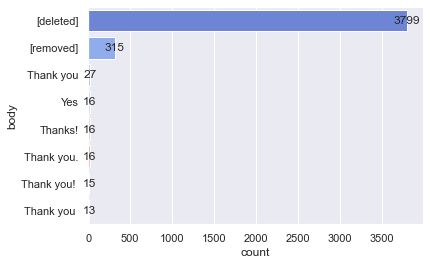

In [71]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Removed comments mehr likes

In [72]:
filtered_df=df[df['body'] == '[removed]']

In [73]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,315.000000,315.000000,315.000000,315.0
mean,-1.692063,12.568254,15.279365,2017.0
std,12.500590,7.571587,8.033651,0.0
min,-83.000000,0.000000,1.000000,2017.0
25%,-1.000000,4.000000,8.000000,2017.0
50%,1.000000,15.000000,17.000000,2017.0
75%,1.000000,19.000000,21.000000,2017.0
max,60.000000,23.000000,30.000000,2017.0


In [74]:
len(filtered_df)

315

Text(0.5, 1.0, 'Histogramm der Scores')

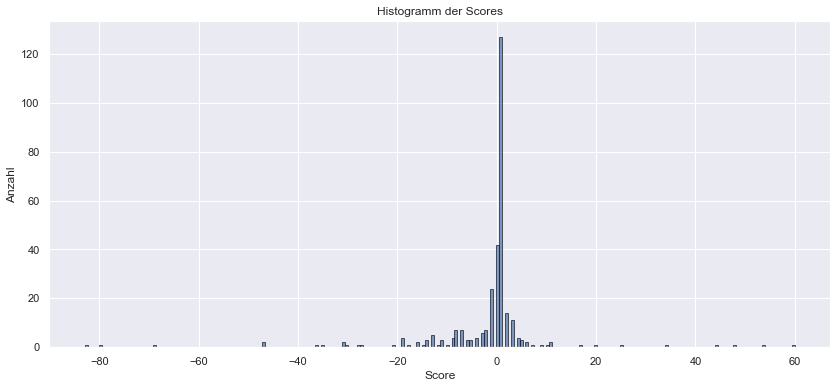

In [75]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')


 Removed Kommentare Löschen

In [76]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                       3799
Thank you                                                                                                                                                                                                                                                         27
Thanks!                                                                                                                                                                                                                                                           16
Thank you.                                                                                                                                                                                                               

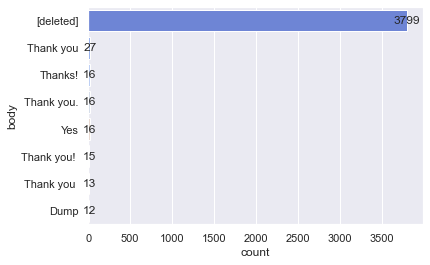

In [77]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben Deleted comments mehr likes

In [78]:
filtered_df_del=df[df['body'] == '[deleted]']

In [79]:
filtered_df_del

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1,[deleted],0,[deleted],True,0,2017-11-01 00:01:44,0,1,0,dp61uho,t3_79wryk,t3_79wryk,1,0,0,1,2017
5,[deleted],0,[deleted],True,0,2017-11-01 00:03:53,0,0,0,dp61y5m,t3_79xltp,t3_79xltp,0,0,0,1,2017
23,[deleted],0,[deleted],True,0,2017-11-01 00:09:11,0,0,0,dp627ag,t3_79zdfo,t3_79zdfo,1,0,0,1,2017
27,[deleted],0,[deleted],True,0,2017-11-01 00:12:19,0,0,0,dp62cmp,t3_79zz4e,t3_79zz4e,1,0,0,1,2017
79,[deleted],0,[deleted],True,0,2017-11-01 00:45:33,0,0,0,dp63y41,t3_7a04y5,t1_dp635om,1,0,0,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66147,[deleted],0,[deleted],True,0,2017-11-30 23:35:46,0,0,0,dql055b,t3_7gq6s9,t3_7gq6s9,1,0,23,30,2017
66157,[deleted],0,[deleted],True,0,2017-11-30 23:41:31,0,0,0,dql0fwy,t3_7gomx4,t3_7gomx4,1,0,23,30,2017
66164,[deleted],0,[deleted],True,0,2017-11-30 23:46:32,0,1,0,dql0p2q,t3_7gnkb9,t3_7gnkb9,13,0,23,30,2017
66172,[deleted],0,[deleted],True,0,2017-11-30 23:48:55,0,0,0,dql0tha,t3_7gn6uj,t1_dql0sb2,2,0,23,30,2017


In [80]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,3799.000000,3799.000000,3799.000000,3799.0
mean,1.624375,12.673335,14.751777,2017.0
std,19.668039,7.428146,8.837586,0.0
min,-199.000000,0.000000,1.000000,2017.0
25%,1.000000,5.000000,7.000000,2017.0
50%,1.000000,15.000000,15.000000,2017.0
75%,1.000000,19.000000,22.000000,2017.0
max,1138.000000,23.000000,30.000000,2017.0


In [175]:
len(filtered_df_del)

3799

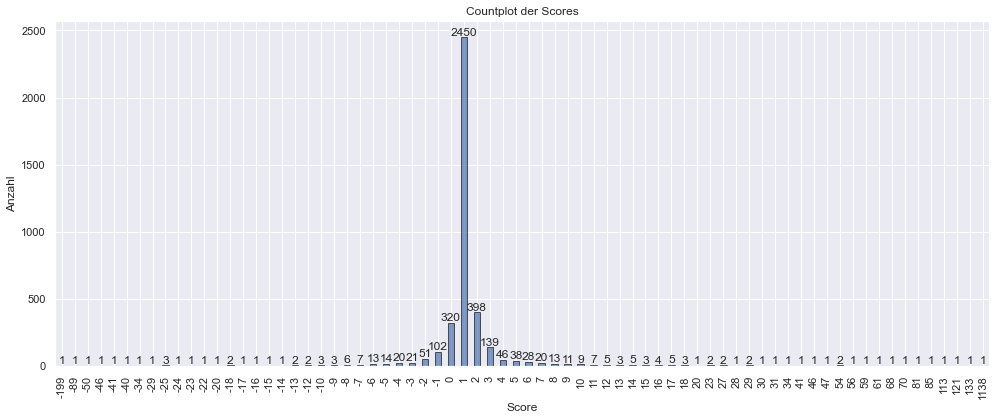

In [81]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()
# Counts über den Balken anzeigen
for i, v in enumerate(counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')


 Kommentare die Deleted wurden löschen

In [82]:
df = df[df['body'] != '[deleted]']

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      27
Yes                                                                                                                                                                                                                   

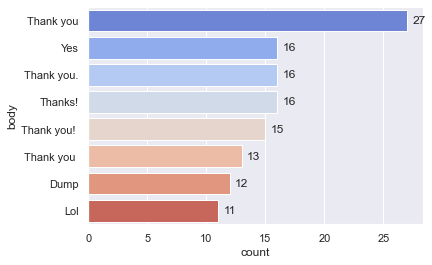

In [83]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

Thank you                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      27
Yes                                                                                                                                                                                                                   

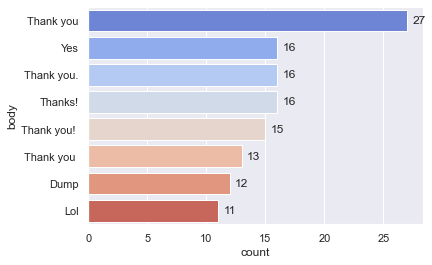

In [184]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

In [84]:
df[df['body'] == "."]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5184,CreateAccoubt,0,.,True,0,2017-11-03 03:54:32,0,1,0,dp9vz6t,t3_7agh4u,t3_7agh4u,4,0,3,3,2017
17624,tfresca,0,.,True,0,2017-11-08 23:47:48,0,0,0,dpjrj1y,t3_7bmcty,t3_7bmcty,1,0,23,8,2017


In [86]:
df[df['body'] == "."]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [87]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61976 entries, 0 to 66197
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   author             61976 non-null  object        
 1   author_flair_text  61976 non-null  object        
 2   body               61976 non-null  object        
 3   can_gild           61976 non-null  bool          
 4   controversiality   61976 non-null  object        
 5   created_utc        61976 non-null  datetime64[ns]
 6   distinguished      61976 non-null  object        
 7   edited             61976 non-null  object        
 8   gilded             61976 non-null  object        
 9   id                 61976 non-null  object        
 10  link_id            61976 non-null  object        
 11  parent_id          61976 non-null  object        
 12  score              61976 non-null  int64         
 13  stickied           61976 non-null  object        
 14  create

# Http und Https und Redditnames removen

# Löschen alle Authoren die AutoModerator sind

In [185]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

# Http und Redditnames rlöschen

In [88]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1659,L1ghtlyS4lted,0,/r/hailcorporate,True,0,2017-11-01 17:53:52,0,0,0,dp76nj1,t3_7a3281,t1_dp6zj6u,4,0,17,1,2017
6747,Herdnerfer,0,/r/deadbedrooms,True,0,2017-11-03 19:29:41,0,0,0,dpaxqyt,t3_7alg13,t3_7alg13,1,0,19,3,2017
39583,zshift,0,/r/beetlejuicing,True,0,2017-11-18 21:30:53,0,0,0,dq0or75,t3_7drqea,t1_dq0c3fm,1,0,21,18,2017
54480,BZ_STEVE,0,/r/theydidthemath,True,0,2017-11-26 05:44:54,0,0,0,dqclkp3,t3_7fhzsn,t1_dqcfnj5,8,0,5,26,2017
57428,Ensoboros,0,/r/bodyweightfitness,True,0,2017-11-27 16:34:24,0,0,0,dqesf5a,t3_7ftk7k,t1_dqelhu7,3,0,16,27,2017


In [89]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men.index)

In [90]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
14298,parkerandhudson,0,http://i.imgur.com/VAaBpei.gif,True,0,2017-11-07 14:22:02,0,0,0,dph290p,t3_7bcycu,t1_dph1leo,1,0,14,7,2017
51414,stellastellamaris,0,http://lmgtfy.com/?q=signs+of+abusive+relation...,True,0,2017-11-24 18:46:17,0,0,0,dqaaao9,t3_7f965u,t1_dqa9rfw,1,0,18,24,2017


In [91]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_rows.index)

In [92]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
4680,[deleted],0,https://www.youtube.com/watch?v=R6mGBB2uzj0&am...,False,0,2017-11-02 23:01:31,0,0,0,dp9hega,t3_7aer5u,t3_7aer5u,1,0,23,2,2017
13267,QwertyvsDvorak,0,https://markmanson.net/fuck-yes,True,0,2017-11-07 00:44:39,0,0,0,dpga5vo,t3_7b9e68,t3_7b9e68,2,0,0,7,2017
15089,blondiegirlderp,0,https://i.imgur.com/BqnmbPM.gifv,True,0,2017-11-07 21:21:20,0,0,0,dphr1g3,t3_7bg31q,t3_7bg31q,93,0,21,7,2017
21479,irreleventuality,0,https://www.youtube.com/watch?v=Nvs5pqf-DMA&am...,True,0,2017-11-10 18:55:10,0,0,0,dpms144,t3_7c0ldc,t3_7c0ldc,1,0,18,10,2017
24331,SuchASillyName616,0,https://youtu.be/iYhYzqqs8pQ,True,0,2017-11-12 08:37:36,0,0,0,dpp9bh2,t3_7c8lf1,t1_dpo7xq4,2,0,8,12,2017
35877,evanvc,0,https://drive.google.com/open?id=0B8E8Vlp90oV2...,True,0,2017-11-17 02:45:55,0,0,0,dpxvp0i,t3_7dg1pu,t3_7dg1pu,1,0,2,17,2017
46480,Sir_not_sir,0,https://www.youtube.com/watch?v=BN1WwnEDWAM,True,0,2017-11-21 23:29:46,0,0,0,dq5ykjj,t3_7em2c7,t3_7em2c7,1,0,23,21,2017
49134,PM_ME_BAKED_ZITI,0,https://imgur.com/jx5FbmK,True,0,2017-11-23 05:42:15,0,0,0,dq84fvb,t3_7ern5c,t1_dq7ok84,3,0,5,23,2017
49846,ArtVents,0,https://youtu.be/PtMU8nvZzOs,True,0,2017-11-23 18:19:46,0,0,0,dq8sta3,t3_7f0yrg,t3_7f0yrg,1,0,18,23,2017
57259,nurse_with_penis,0,https://www.urbandictionary.com/define.php?ter...,True,0,2017-11-27 15:05:25,0,0,0,dqenr2d,t3_7fqzh5,t1_dqdsct0,1,0,15,27,2017


In [93]:
df = df.drop(selected_rows_2.index)

In [94]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [95]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
19735,dsquared513,0,r/badmensanatomy,True,0,2017-11-09 23:02:09,0,0,0,dplfrdi,t3_7bsewi,t1_dpl04ov,-1,0,23,9,2017
28021,[deleted],0,r/catmourningadvice,False,0,2017-11-13 23:25:43,0,0,0,dps1411,t3_7counl,t3_7counl,1,0,23,13,2017
56799,blackdog6621,0,r/raisedbynarcissists,True,0,2017-11-27 09:10:59,0,0,0,dqecnm6,t3_7fs0ni,t3_7fs0ni,1,0,9,27,2017


In [96]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [97]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [98]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [99]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
6685,UndergroundLurker,0,https://www.reddit.com/r/AskWomen/comments/7aj...,True,0,2017-11-03 19:03:05,0,0,0,dpaw67p,t3_7afnql,t3_7afnql,2,0,19,3,2017
7292,viv12678,0,https://www.reddit.com/r/relationship_advice/c...,True,0,2017-11-04 00:24:17,0,0,0,dpbd9ap,t3_7akbbz,t1_dpbcsdq,4,0,0,4,2017
12347,stellastellamaris,0,https://captainawkward.com/2011/04/11/blanket-...,True,0,2017-11-06 19:07:54,0,0,0,dpfr78f,t3_7b74l4,t3_7b74l4,5,0,19,6,2017
20300,wordpuke,0,https://www.reddit.com/r/Advice/comments/72edc...,True,0,2017-11-10 04:53:13,0,0,0,dplwnjq,t3_7byblw,t3_7byblw,1,0,4,10,2017
21586,Vendetta5885,0,https://media1.tenor.com/images/5fa7fa2dc5dda3...,True,0,2017-11-10 19:53:48,0,0,0,dpmvcm4,t3_7c3emq,t1_dpmukbo,1,0,19,10,2017
26841,I_HATE_MOTORTRIKES,0,https://media.giphy.com/media/t5b9QsINPO12/gip...,True,0,2017-11-13 14:37:40,0,0,0,dpr5l9b,t3_7cml3q,t3_7cml3q,1,0,14,13,2017
36254,UoAPUA,0,https://m.imgur.com/gallery/yn71Eto,True,0,2017-11-17 08:50:14,0,0,0,dpy9o8h,t3_7dgk67,t3_7dgk67,1,0,8,17,2017
38113,Alvraen,0,https://www.reddit.com/r/relationship_advice/c...,True,0,2017-11-18 00:30:40,0,0,0,dpzg1rk,t3_7dlkrg,t1_dpytpt7,1,0,0,18,2017
38114,Alvraen,0,https://www.reddit.com/r/relationship_advice/c...,True,0,2017-11-18 00:30:46,0,0,0,dpzg1wl,t3_7dlkrg,t1_dpyv9rs,1,0,0,18,2017
42536,Bercik32,0,http://dailychiefers.com/wp-content/media/2015...,True,0,2017-11-20 09:52:01,0,0,0,dq32mn7,t3_7e7s7n,t1_dq32i7r,4,0,9,20,2017


In [100]:
df.drop(url_only_rows.index, inplace=True)

# Delete Bots

In [101]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [102]:
df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [103]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_9812/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1369,metric_units,0,40 lb ≈ 18 kg\n\n^metric ^units ^bot ^| [^feed...,True,0,2017-11-01 16:02:12,0,0,0,dp6zuph,t3_7a1he2,t1_dp6zul7,1,0,16,1,2017
4389,TotesMessenger,0,"I'm a bot, *bleep*, *bloop*. Someone has linke...",True,0,2017-11-02 20:21:24,0,0,0,dp98nh9,t3_7adi0a,t3_7adi0a,1,0,20,2,2017
5308,mm172,0,&gt; Why would a hacker or bot or whatever els...,True,0,2017-11-03 05:13:34,0,0,0,dp9yzx3,t3_7ahcs3,t3_7ahcs3,11,0,5,3,2017
5521,TotesMessenger,0,"I'm a bot, *bleep*, *bloop*. Someone has linke...",True,0,2017-11-03 08:58:02,0,0,0,dpa4gza,t3_7af11t,t3_7af11t,0,0,8,3,2017
8889,ZhenLegend,0,I think we seriously need Ops to put a block o...,True,0,2017-11-05 00:23:19,0,0,0,dpcvead,t3_7au7qz,t3_7au7qz,1,0,0,5,2017
8905,Could_have_listened,0,&gt; could of \n\n Did you mean could've? \n\n...,True,0,2017-11-05 00:37:54,0,0,0,dpcw3kj,t3_7atqgf,t1_dpcw3fe,11,0,0,5,2017
8935,reseatshisglasses,0,Good bot,True,0,2017-11-05 00:52:39,0,0,0,dpcwshi,t3_7atqgf,t1_dpcw3kj,5,0,0,5,2017
10649,metric_units,0,353 miles ≈ 570 km\n\n^metric ^units ^bot ^| [...,True,0,2017-11-05 21:57:56,0,0,0,dpe9v7h,t3_7b0isr,t1_dpe9v3a,1,0,21,5,2017
14839,Hoosierdaddy1964,0,Good bot,True,0,2017-11-07 19:33:32,0,0,0,dphkjwz,t3_7bfguu,t1_dphjlsl,0,0,19,7,2017
14840,perrycohen,0,Are you sure about that? Because I am 97.0321%...,True,0,2017-11-07 19:33:44,0,0,0,dphkkc1,t3_7bfguu,t1_dphkjwz,2,0,19,7,2017


In [104]:
indices_to_remove = [0, 1, 3, 5, 7, 9, 10, 12,16, 17,18,19,20,21,22,25,27,28,29,30,31,34,35,37,38,39,41,42,43,45,46,47,48,49,50,51,52,53,54,55,56,57,58]
bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
# Abrufen der Indexwerte der Zeilen in bot_in_body_rows, die gelöscht werden sollen
indices_to_delete = bot_in_body_rows.iloc[indices_to_remove].index

# Löschen der Zeilen im Original DataFrame df
df.drop(indices_to_delete, inplace=True)

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_9812/373737143.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


In [105]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_9812/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5308,mm172,0,&gt; Why would a hacker or bot or whatever els...,True,0,2017-11-03 05:13:34,0,0,0,dp9yzx3,t3_7ahcs3,t3_7ahcs3,11,0,5,3,2017
8889,ZhenLegend,0,I think we seriously need Ops to put a block o...,True,0,2017-11-05 00:23:19,0,0,0,dpcvead,t3_7au7qz,t3_7au7qz,1,0,0,5,2017
8935,reseatshisglasses,0,Good bot,True,0,2017-11-05 00:52:39,0,0,0,dpcwshi,t3_7atqgf,t1_dpcw3kj,5,0,0,5,2017
14839,Hoosierdaddy1964,0,Good bot,True,0,2017-11-07 19:33:32,0,0,0,dphkjwz,t3_7bfguu,t1_dphjlsl,0,0,19,7,2017
16836,Durbee,0,Good bot!,True,0,2017-11-08 17:35:50,0,0,0,dpj5zi1,t3_7bkon0,t1_dpj3qq6,1,0,17,8,2017
18762,jinx__bot,0,Jinx! You and fakefalse posted the same commen...,True,0,2017-11-09 16:27:33,0,0,0,dpksmk9,t3_7bu89e,t1_dpksm46,2,0,16,9,2017
18772,Hoosierdaddy1964,0,Good bot,True,0,2017-11-09 16:32:25,0,0,0,dpkswr1,t3_7bu89e,t1_dpksmk9,1,0,16,9,2017
22988,The_Frown_Inverter,0,I think the above poster might be a bot.,True,0,2017-11-11 16:36:45,0,0,0,dpo3rg7,t3_7c7f1r,t1_dpnzwvr,2,0,16,11,2017
29923,NvKKcL,0,&gt; Buddy the blue wave is coming in the next...,True,1,2017-11-14 19:31:05,0,0,0,dpti8gc,t3_78kglq,t1_dpt9byt,2,0,19,14,2017
31652,Squig173,0,I think you’ve already acted on other people’s...,True,0,2017-11-15 13:08:50,0,0,0,dpus0bg,t3_7d3ks1,t3_7d3ks1,59,0,13,15,2017


In [106]:
indices_to_remove = [2, 3, 4, 6,12,13,14]
bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
# Abrufen der Indexwerte der Zeilen in bot_in_body_rows, die gelöscht werden sollen
indices_to_delete = bot_in_body_rows.iloc[indices_to_remove].index

# Löschen der Zeilen im Original DataFrame df
df.drop(indices_to_delete, inplace=True)

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_9812/1113863299.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


In [107]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_9812/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5308,mm172,0,&gt; Why would a hacker or bot or whatever els...,True,0,2017-11-03 05:13:34,0,0,0,dp9yzx3,t3_7ahcs3,t3_7ahcs3,11,0,5,3,2017
8889,ZhenLegend,0,I think we seriously need Ops to put a block o...,True,0,2017-11-05 00:23:19,0,0,0,dpcvead,t3_7au7qz,t3_7au7qz,1,0,0,5,2017
18762,jinx__bot,0,Jinx! You and fakefalse posted the same commen...,True,0,2017-11-09 16:27:33,0,0,0,dpksmk9,t3_7bu89e,t1_dpksm46,2,0,16,9,2017
22988,The_Frown_Inverter,0,I think the above poster might be a bot.,True,0,2017-11-11 16:36:45,0,0,0,dpo3rg7,t3_7c7f1r,t1_dpnzwvr,2,0,16,11,2017
29923,NvKKcL,0,&gt; Buddy the blue wave is coming in the next...,True,1,2017-11-14 19:31:05,0,0,0,dpti8gc,t3_78kglq,t1_dpt9byt,2,0,19,14,2017
31652,Squig173,0,I think you’ve already acted on other people’s...,True,0,2017-11-15 13:08:50,0,0,0,dpus0bg,t3_7d3ks1,t3_7d3ks1,59,0,13,15,2017
32998,guylfe,0,Meh. Decent-at-best bot. As a fan of portmante...,True,0,2017-11-15 22:37:23,0,0,0,dpvozyl,t3_7d3ks1,t1_dpvovun,1,0,22,15,2017
37094,Should_have_listened,0,&gt; should of \n\n Did you mean should've? \n...,True,0,2017-11-17 18:12:51,0,0,0,dpyw49h,t3_7dlgpz,t1_dpyw3fl,3,0,18,17,2017
44898,l3tters_neversent,0,"Sitting down is great. Using lots of "" i feel ...",True,0,2017-11-21 08:00:11,0,0,0,dq4rxf8,t3_7bd15u,t1_dplww23,1,0,8,21,2017


In [108]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [109]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [110]:
 df[df['author'] == 'theHelperdroid']

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [111]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_9812/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
5308,mm172,0,&gt; Why would a hacker or bot or whatever els...,True,0,2017-11-03 05:13:34,0,0,0,dp9yzx3,t3_7ahcs3,t3_7ahcs3,11,0,5,3,2017
8889,ZhenLegend,0,I think we seriously need Ops to put a block o...,True,0,2017-11-05 00:23:19,0,0,0,dpcvead,t3_7au7qz,t3_7au7qz,1,0,0,5,2017
18762,jinx__bot,0,Jinx! You and fakefalse posted the same commen...,True,0,2017-11-09 16:27:33,0,0,0,dpksmk9,t3_7bu89e,t1_dpksm46,2,0,16,9,2017
22988,The_Frown_Inverter,0,I think the above poster might be a bot.,True,0,2017-11-11 16:36:45,0,0,0,dpo3rg7,t3_7c7f1r,t1_dpnzwvr,2,0,16,11,2017
29923,NvKKcL,0,&gt; Buddy the blue wave is coming in the next...,True,1,2017-11-14 19:31:05,0,0,0,dpti8gc,t3_78kglq,t1_dpt9byt,2,0,19,14,2017
31652,Squig173,0,I think you’ve already acted on other people’s...,True,0,2017-11-15 13:08:50,0,0,0,dpus0bg,t3_7d3ks1,t3_7d3ks1,59,0,13,15,2017
32998,guylfe,0,Meh. Decent-at-best bot. As a fan of portmante...,True,0,2017-11-15 22:37:23,0,0,0,dpvozyl,t3_7d3ks1,t1_dpvovun,1,0,22,15,2017
37094,Should_have_listened,0,&gt; should of \n\n Did you mean should've? \n...,True,0,2017-11-17 18:12:51,0,0,0,dpyw49h,t3_7dlgpz,t1_dpyw3fl,3,0,18,17,2017
44898,l3tters_neversent,0,"Sitting down is great. Using lots of "" i feel ...",True,0,2017-11-21 08:00:11,0,0,0,dq4rxf8,t3_7bd15u,t1_dplww23,1,0,8,21,2017


In [112]:
df_bot=pd.read_csv("bot_names.csv")

In [113]:

df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [114]:
#mask[mask].index
df_check_bot=df.filter(items = mask[mask].index, axis=0)
#df_13_bot.duplicated(subset=['clean_text'])#

In [115]:
df_check_bot

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
2,biased_milk_hotel,0,I dislike big age-gaps because I think someone...,True,0,2017-11-01 00:01:50,0,0,0,dp61uoc,t3_79zqam,t3_79zqam,1,0,0,1,2017
10,biased_milk_hotel,0,I mean you don't have to be friends with all o...,True,0,2017-11-01 00:05:29,0,0,0,dp620v5,t3_79zdwl,t3_79zdwl,3,0,0,1,2017
35,hot_damnit,0,"I mean, I'm absolutely going to leave and move...",True,0,2017-11-01 00:16:49,0,0,0,dp62klc,t3_7a00k8,t1_dp62fic,1,0,0,1,2017
50,skytrain-reddit,0,Well what did you say ???,True,0,2017-11-01 00:29:07,0,0,0,dp635om,t3_7a04y5,t3_7a04y5,3,0,0,1,2017
85,skytrain-reddit,0,Dude what's wrong with you.\n\n\nLet her enjoy...,True,0,2017-11-01 00:48:02,0,0,0,dp642dd,t3_79zzyi,t3_79zzyi,2,0,0,1,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65998,ShotsAways,0,"keeping it a secret isnt too bad, unless they'...",True,0,2017-11-30 22:41:03,0,0,0,dqkx6qk,t3_7gq948,t3_7gq948,1,0,22,30,2017
66140,Poopsimax,0,Let's just say she didn't cheat with the ex.\n...,True,0,2017-11-30 23:30:19,0,0,0,dqkzuuu,t3_7gndnz,t3_7gndnz,1,0,23,30,2017
66178,deadshot414,0,I would tell him that she doesn't deserve him ...,True,0,2017-11-30 23:51:19,0,0,0,dql0xxu,t3_7gqr4y,t1_dql0myl,1,0,23,30,2017
66180,hot_damnit,0,Her reaction to invite your bf to another fami...,True,0,2017-11-30 23:51:50,0,0,0,dql0yw3,t3_7gpl3g,t3_7gpl3g,5,0,23,30,2017


In [116]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
1237,RedditSilverRobot,0,"###[Here's your Reddit Silver, wackypacks!](ht...",True,0,2017-11-01 15:13:33,0,0,0,dp6x0y2,t3_7a43oe,t1_dp6x0is,1,0,15,1,2017
1737,Littlebotweak,0,Almost every sexually active adult has had a f...,True,0,2017-11-01 18:23:16,0,0,0,dp78foy,t3_7a57rg,t3_7a57rg,4,0,18,1,2017
1937,RedditSilverRobot,0,"###[Here's your Reddit Silver, ofjune-x!](http...",True,0,2017-11-01 19:57:17,0,0,0,dp7e0lc,t3_7a5ryq,t1_dp7e051,1,0,19,1,2017
7361,Littlebotweak,0,You should have left when she cheated.,True,0,2017-11-04 01:28:00,0,0,0,dpbg6bc,t3_7ak9ha,t3_7ak9ha,1,0,1,4,2017
8815,Littlebotweak,0,What is wrong with you? Their sex life us none...,True,0,2017-11-04 23:45:22,0,0,0,dpctkpa,t3_7atug8,t3_7atug8,11,0,23,4,2017
9013,Littlebotweak,0,Tl;dr - you gotta cast a wide net. It's a numb...,True,0,2017-11-05 01:48:00,0,0,0,dpczdub,t3_7auizd,t1_dpcy8yx,4,0,1,5,2017
12256,RedditSilverRobot,0,"###[Here's your Reddit Silver, Baby_Jaws!](htt...",True,0,2017-11-06 18:36:55,0,0,0,dpfpgdb,t3_7b261x,t1_dpfpfui,1,0,18,6,2017
13539,Littlebotweak,0,Two decades younger from another country? Can ...,True,0,2017-11-07 02:59:17,0,1,0,dpgh3xt,t3_7ba3ck,t3_7ba3ck,4,0,2,7,2017
13572,Littlebotweak,0,"And, now you've learned why some adults date s...",True,0,2017-11-07 03:15:10,0,0,0,dpghvx2,t3_7bacw2,t3_7bacw2,6,0,3,7,2017
13580,Littlebotweak,0,Did you ask him about it? Perhaps he rarely us...,True,0,2017-11-07 03:19:54,0,0,0,dpgi4ov,t3_7bag6h,t3_7bag6h,1,0,3,7,2017


In [148]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RedditSilverRobot","jinx__bot","image_linker_bot","friendly-bot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [150]:
df[df['author'].str.contains("RedditSilverRobot")]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [151]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [152]:
df[df['body'].str.contains("bloop", case=False, regex=True)]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [153]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [156]:
df_check_bot[df_check_bot['body'].str.contains('Bot')]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year
36752,redditlady999,0,"Both sexes compromise for each other, if the r...",True,0,2017-11-17 15:44:30,0,0,0,dpynfxr,t3_7db9vf,t1_dpxpv8p,1,0,15,17,2017
39826,RemindMeBot,0,I will be messaging you on [**2017-11-20 00:20...,True,0,2017-11-19 00:20:24,0,0,0,dq0wh9u,t3_7drqea,t1_dq0wguc,2,0,0,19,2017
40640,VoltaicSketchyTeapot,0,My feeling is that every woman (and man) shoul...,True,0,2017-11-19 13:55:22,0,0,0,dq1lm2g,t3_7e02sn,t3_7e02sn,2,0,13,19,2017
42131,RemindMeBot,0,I will be messaging you on [**2017-11-21 04:56...,True,0,2017-11-20 04:56:32,0,0,0,dq2u7wb,t3_7e4s8n,t1_dq2u7ki,0,0,4,20,2017
52573,WikiTextBot,0,**Flirty Fishing**\n\nFlirty Fishing (FFing) i...,True,0,2017-11-25 10:55:42,0,0,0,dqba9kt,t3_7f7mdu,t1_dqba9hv,1,0,10,25,2017
52757,WikiTextBot,0,**Dark triad**\n\nThe dark triad is a subject ...,True,0,2017-11-25 14:49:46,0,0,0,dqbg7om,t3_7fdtyb,t1_dqbg7l8,3,0,14,25,2017
53457,WikiTextBot,0,**Irregardless**\n\nIrregardless is a word com...,True,0,2017-11-25 21:48:00,0,0,0,dqc0a9g,t3_7fgv7d,t1_dqc0a4d,3,0,21,25,2017
64654,RemindMeBot,0,I will be messaging you on [**2017-12-03 14:39...,True,0,2017-11-30 14:39:27,0,0,0,dqk40ql,t3_7giqtc,t1_dqk40gz,1,0,14,30,2017


In [157]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ["RemindMeBot","WikiTextBot"]

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [163]:
df_check_bot[df_check_bot['author'].str.contains('WaterIsWetBot')]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


In [160]:
df_check_bot[df_check_bot['author'].str.contains('youtube')]

,author,author_flair_text,body,can_gild,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year


# NLP Deleting

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("relationship_advise_17_comments_EDA_clean.csv",sep=";")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61879 entries, 0 to 61878
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             61879 non-null  object
 1   author_flair_text  61879 non-null  int64 
 2   body               61879 non-null  object
 3   controversiality   61879 non-null  int64 
 4   created_utc        61879 non-null  object
 5   distinguished      61879 non-null  object
 6   edited             61879 non-null  int64 
 7   gilded             61879 non-null  int64 
 8   id                 61879 non-null  object
 9   link_id            61879 non-null  object
 10  parent_id          61879 non-null  object
 11  score              61879 non-null  int64 
 12  stickied           61879 non-null  int64 
 13  created_hour       61879 non-null  int64 
 14  created_day        61879 non-null  int64 
 15  created_year       61879 non-null  int64 
dtypes: int64(9), object(7)
memory usage: 7.6

In [5]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                    body  \
0      Honestly, part of me wants to give the guy the...   
1      I dislike big age-gaps because I think someone...   
2      I think you should bring up your concerns. Sin...   
3      This is why some 31 year old men insist on dat...   
4      Coming from a 16 year old the age gap is a bit...   
...                                                  ...   
61874  Hey. Thanks for your input, I appreciate it. A...   
61875  These days, with dating apps and the easy natu...   
61876   But, if he felt he needed to go (he wanted to...   
61877  This sounds like an absolutely untenable, cont...   
61878  They might be thinking "if you take her home a...   

                                              clean_text  
0      Honestly part of me wants to give the guy the ...  
1      I dislike big age gaps because I think someone...  
2      I think you should bring up your concerns . Si...  
3      This is why some year old men insist

In [7]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [8]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
912,imfsfcltj,0,,0,2017-11-01 13:22:13,0,0,0,dp6rfn6,t3_7a3281,t3_7a3281,3,0,13,1,2017,,0
1095,morflegober,0,,0,2017-11-01 14:58:41,0,1,0,dp6w7gz,t3_7a2nkm,t3_7a2nkm,2,0,14,1,2017,,0
1990,throwaway6873784,0,,0,2017-11-01 21:16:37,0,0,0,dp7is2k,t3_7a0gfd,t1_dp7gez2,2,0,21,1,2017,,0
2097,UpperLeftyOne,0,,0,2017-11-01 22:26:13,0,0,0,dp7mlka,t3_7a57rg,t1_dp78foy,1,0,22,1,2017,,0
6976,ThunderChaser,0,ｋａｒｓｈ,0,2017-11-04 03:04:16,0,0,0,dpbkfdv,t3_7akbbz,t1_dpb635t,1,0,3,4,2017,,0
7285,Kynag,0,,0,2017-11-04 10:00:38,0,0,0,dpbvakd,t3_7apr48,t3_7apr48,1,0,10,4,2017,,0
10761,sn00p3r,0,/r/deadbedrooms,0,2017-11-06 14:09:02,0,0,0,dpfao0x,t3_7b36nc,t3_7b36nc,1,0,14,6,2017,,0
11774,9DAN2,0,r/Karmaconspiracy,0,2017-11-06 21:23:53,0,0,0,dpfzdgb,t3_7b54ac,t1_dpfuinr,3,0,21,6,2017,,0
12623,MissJun,0,https://youtu.be/yWVoqpXfiPA,0,2017-11-07 04:14:20,0,0,0,dpgkpuv,t3_7bag6h,t3_7bag6h,1,0,4,7,2017,,0
12666,bamboosticksuey,0,21,0,2017-11-07 04:33:05,0,0,0,dpgljii,t3_7baqis,t1_dpglfz0,1,0,4,7,2017,,0


In [9]:
df = df[df['comment_len'] != 0]

# Finale EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61822 entries, 0 to 61878
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             61822 non-null  object
 1   author_flair_text  61822 non-null  int64 
 2   body               61822 non-null  object
 3   controversiality   61822 non-null  int64 
 4   created_utc        61822 non-null  object
 5   distinguished      61822 non-null  object
 6   edited             61822 non-null  int64 
 7   gilded             61822 non-null  int64 
 8   id                 61822 non-null  object
 9   link_id            61822 non-null  object
 10  parent_id          61822 non-null  object
 11  score              61822 non-null  int64 
 12  stickied           61822 non-null  int64 
 13  created_hour       61822 non-null  int64 
 14  created_day        61822 non-null  int64 
 15  created_year       61822 non-null  int64 
 16  clean_text         61822 non-null  objec

In [165]:
#df=df.drop(["can_gild"], axis = 1)

In [11]:
df.describe()

,author_flair_text,controversiality,edited,gilded,score,stickied,created_hour,created_day,created_year,comment_len
count,61822.0,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.000000,61822.0,61822.000000
mean,0.0,0.013507,0.024716,0.000081,4.226683,0.000065,12.747582,15.653408,2017.0,67.946572
std,0.0,0.115431,0.155260,0.008993,23.787632,0.008044,7.279891,8.782465,0.0,79.864196
min,0.0,0.000000,0.000000,0.000000,-190.000000,0.000000,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,8.000000,2017.0,19.000000
50%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,16.000000,2017.0,43.000000
75%,0.0,0.000000,0.000000,0.000000,3.000000,0.000000,19.000000,23.000000,2017.0,88.000000
max,0.0,1.000000,1.000000,1.000000,1878.000000,1.000000,23.000000,30.000000,2017.0,1672.000000


In [12]:
df.head()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
0,khmer703,0,"Honestly, part of me wants to give the guy the...",0,2017-11-01 00:01:02,0,1,0,dp61tbt,t3_79th5k,t1_dp5th9c,2,0,0,1,2017,Honestly part of me wants to give the guy the ...,276
1,biased_milk_hotel,0,I dislike big age-gaps because I think someone...,0,2017-11-01 00:01:50,0,0,0,dp61uoc,t3_79zqam,t3_79zqam,1,0,0,1,2017,I dislike big age gaps because I think someone...,24
2,Boppyboy207,0,I think you should bring up your concerns. Sin...,0,2017-11-01 00:01:55,0,0,0,dp61usz,t3_79zweh,t3_79zweh,2,0,0,1,2017,I think you should bring up your concerns . Si...,145
3,Smallbuteffective86,0,This is why some 31 year old men insist on dat...,0,2017-11-01 00:01:57,0,0,0,dp61uvc,t3_79zqam,t3_79zqam,2,0,0,1,2017,This is why some year old men insist on dating...,397
4,its_the_green_che,0,Coming from a 16 year old the age gap is a bit...,0,2017-11-01 00:04:01,0,0,0,dp61yel,t3_79zm0h,t3_79zm0h,6,0,0,1,2017,Coming from a year old the age gap is a bit od...,82


In [13]:
df.tail()

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
61874,somedayallourdreams,0,"Hey. Thanks for your input, I appreciate it. A...",0,2017-11-30 23:58:08,0,0,0,dql1am1,t3_7gi9is,t1_dqjrrga,1,0,23,30,2017,Hey . Thanks for your input I appreciate it . ...,18
61875,cookmybook,0,"These days, with dating apps and the easy natu...",0,2017-11-30 23:58:22,0,0,0,dql1b1j,t3_7gnxa9,t1_dqkebzc,12,0,23,30,2017,These days with dating apps and the easy natur...,78
61876,outdatedopinion,0,"But, if he felt he needed to go (he wanted to...",0,2017-11-30 23:59:37,0,0,0,dql1daa,t3_7gnkm9,t1_dqkhhas,2,0,23,30,2017,But if he felt he needed to go he wanted to ge...,32
61877,Philomath1313,0,"This sounds like an absolutely untenable, cont...",0,2017-11-30 23:59:47,0,1,0,dql1dlh,t3_7gop26,t3_7gop26,1,0,23,30,2017,This sounds like an absolutely untenable contr...,98
61878,New1new1,0,"They might be thinking ""if you take her home a...",0,2017-11-30 23:59:58,0,0,0,dql1dy7,t3_7gnxa9,t3_7gnxa9,0,0,23,30,2017,They might be thinking if you take her home af...,46


# Controversialty

In [15]:
df['controversiality'] = df['controversiality'].replace(0,False)
df['controversiality'] = df['controversiality'].replace(1,True)

False    60987
True       835
Name: controversiality, dtype: int64


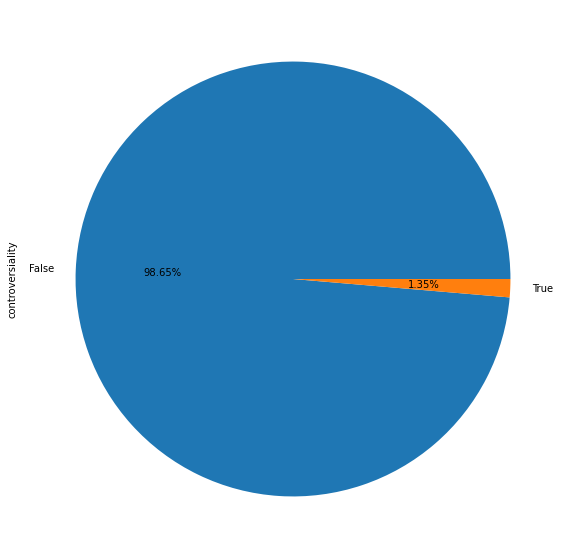

In [16]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

# Stickied

In [19]:
df['stickied'] = df['stickied'].replace(0,False)
df['stickied'] = df['stickied'].replace(1,True)

False    61818
True         4
Name: stickied, dtype: int64


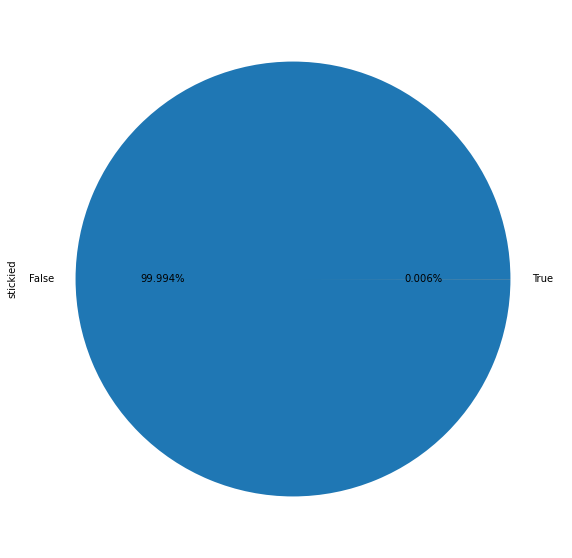

In [20]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["stickied"].value_counts())

# Link_id

t3_7fhzsn    589
t3_7fwkdk    348
t3_7ctdhc    325
t3_7akbbz    321
t3_7dnodm    268
            ... 
t3_7enzoa      1
t3_7axipf      1
t3_7ep0h0      1
t3_7eot3z      1
t3_7gqr3d      1
Name: link_id, Length: 8013, dtype: int64


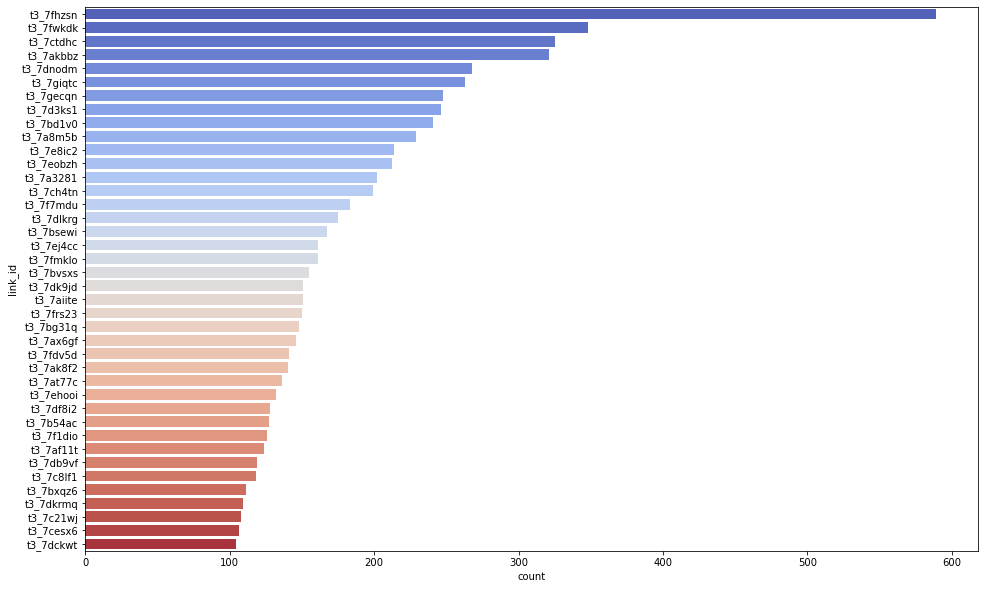

In [21]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [22]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 8013


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

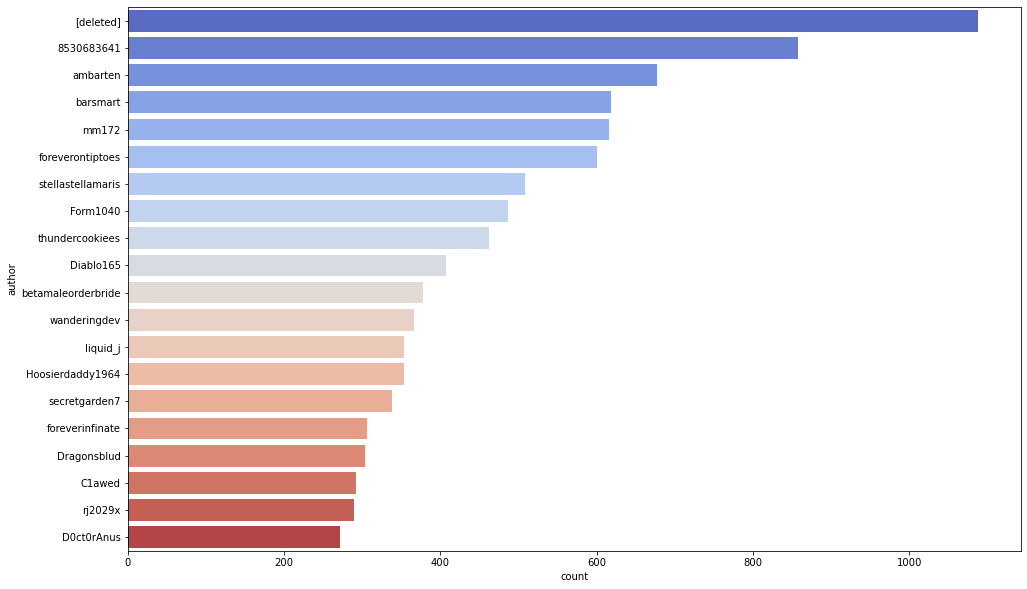

In [23]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne deleted

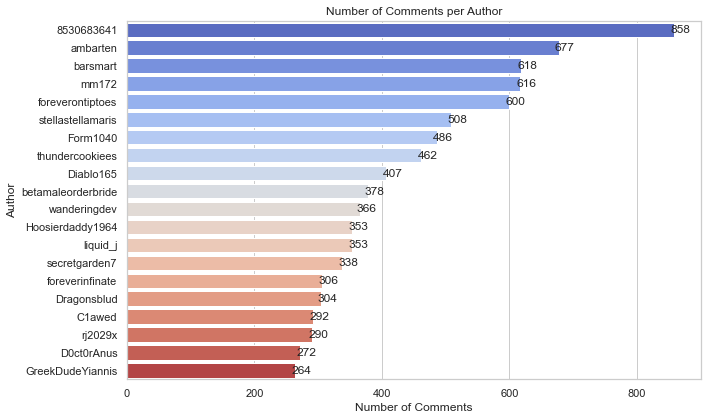

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [25]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 11830


In [26]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 7.72


In [27]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 5.23


# Hours

([<matplotlib.axis.XTick at 0x7ff1a8cdbca0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

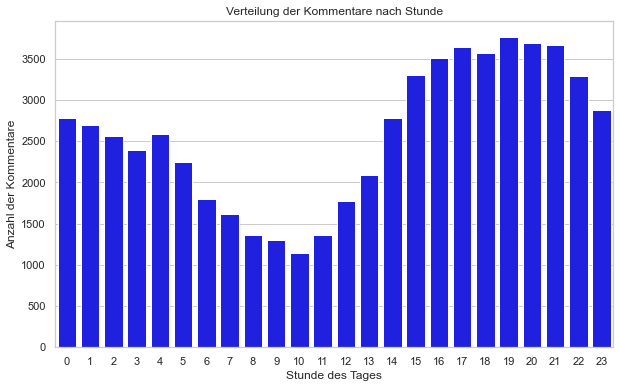

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

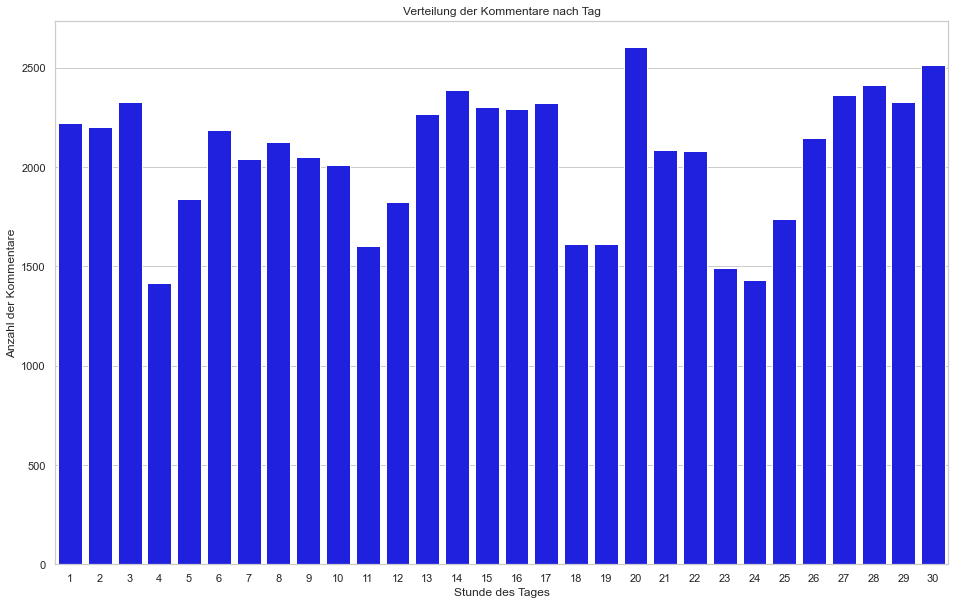

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

0    61817
1        5
Name: gilded, dtype: int64


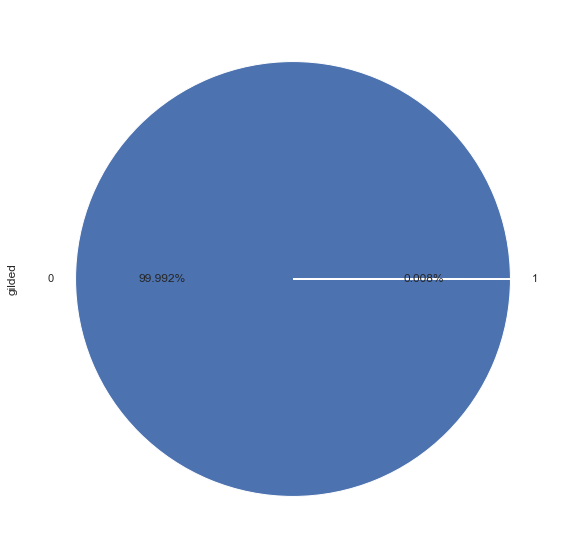

In [31]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["gilded"].value_counts())

# Distinguished

In [32]:
df["distinguished"] = df["distinguished"].replace(0,"0")
df["distinguished"] = df["distinguished"].replace("0",False)

False        61817
moderator        5
Name: distinguished, dtype: int64


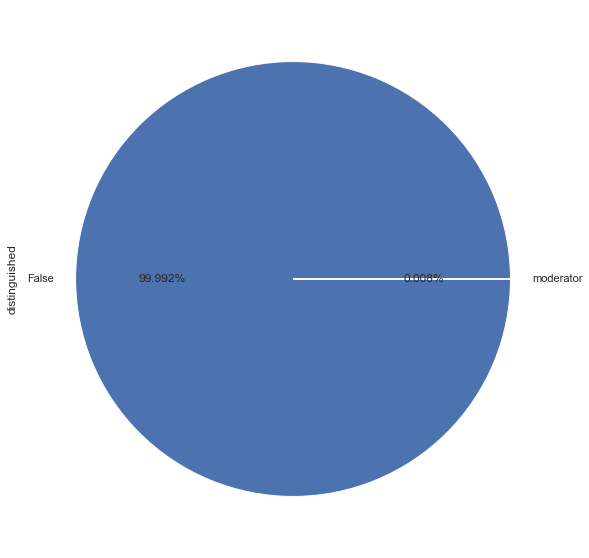

In [33]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df["distinguished"].value_counts())

# Edited

In [34]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    60294
True      1528
Name: edited, dtype: int64


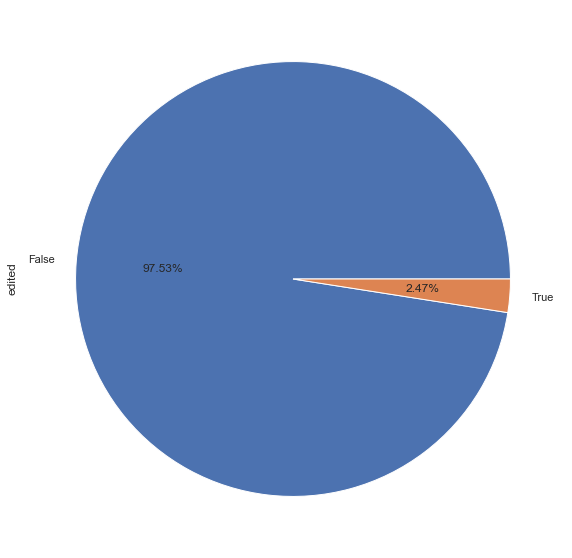

In [35]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [36]:
df["score"].mean()

4.226683057811135

In [37]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
47678,buck-B,0,Clean yourself up for yourself . Be the best y...,False,2017-11-24 15:25:35,False,False,0,dqa0xre,t3_7f7mdu,t3_7f7mdu,1878,False,15,24,2017,Clean yourself up for yourself . Be the best y...,19
49828,redhairedtyrant,0,Child support. I'll bet Reddit gold that he ha...,False,2017-11-25 21:25:26,False,False,0,dqbz6ur,t3_7fhzsn,t3_7fhzsn,1811,False,21,25,2017,Child support . I ll bet Reddit gold that he h...,16
41355,MonsieurLeDude,0,I'm so sorry. Please consider counseling. This...,False,2017-11-21 00:51:59,False,False,0,dq49k8d,t3_7edrg4,t3_7edrg4,1383,False,0,21,2017,I m so sorry . Please consider counseling . Th...,19
13905,rj2029x,0,"You know how to move on, you're just looking f...",False,2017-11-07 20:54:28,False,False,0,dphpfck,t3_7bg31q,t3_7bg31q,1231,False,20,7,2017,You know how to move on you re just looking fo...,101
59547,foreverontiptoes,0,Divorce your crazy ass wife.,False,2017-11-30 02:13:18,False,False,0,dqjejgj,t3_7giqtc,t3_7giqtc,1090,False,2,30,2017,Divorce your crazy ass wife .,6
49085,belladell,0,When someone wants you to choose between them ...,False,2017-11-25 12:36:12,False,False,0,dqbca5b,t3_7fdv5d,t3_7fdv5d,991,False,12,25,2017,When someone wants you to choose between them ...,17
59635,HatesNewUsernames,0,"Dude, sounds like your wife has the manifestat...",False,2017-11-30 03:13:10,False,False,0,dqjhn9z,t3_7giqtc,t3_7giqtc,938,False,3,30,2017,Dude sounds like your wife has the manifestati...,18
61190,pris_27,0,"""Hey guys, I'm gonna go shopping for some food...",False,2017-11-30 19:41:11,False,False,0,dqkme8l,t3_7gomx4,t3_7gomx4,899,False,19,30,2017,Hey guys I m gon na go shopping for some food ...,72
5760,littlesairbear,0,Is your husband five fucking years old???,False,2017-11-03 16:22:25,False,False,0,dpamhdx,t3_7akbbz,t3_7akbbz,879,False,16,3,2017,Is your husband five fucking years old,7
49829,davidandsarah08,0,"Things it could be: Mistress, child support, h...",False,2017-11-25 21:25:35,False,False,0,dqbz736,t3_7fhzsn,t3_7fhzsn,853,False,21,25,2017,Things it could be Mistress child support help...,719


In [38]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,body,controversiality,created_utc,distinguished,edited,gilded,id,link_id,parent_id,score,stickied,created_hour,created_day,created_year,clean_text,comment_len
1255,inguna30,0,You must be kidding. It’s already shows you ar...,False,2017-11-01 15:56:42,False,True,0,dp6zj6u,t3_7a3281,t1_dp6q9q6,-190,False,15,1,2017,You must be kidding . It s already shows you a...,29
34150,Phaeer,0,If he is after a gorgeous 18 year old college ...,False,2017-11-17 15:21:20,False,False,0,dpym63p,t3_7dk9jd,t1_dpyfbfn,-170,False,15,17,2017,If he is after a gorgeous year old college gir...,48
59276,Superdudeo,0,What needs? Ego soothing?,False,2017-11-29 22:56:30,False,False,0,dqj48rt,t3_7ge5uq,t1_dqik21x,-88,False,22,29,2017,What needs Ego soothing,4
14330,Questionnaire7,0,Hey thats sex shaming I got banned from r/sex ...,False,2017-11-08 01:04:28,False,False,0,dpi32m3,t3_7bg31q,t1_dphpfck,-85,False,1,8,2017,Hey thats sex shaming I got banned from for a ...,13
55112,Mirrormn,0,It's interesting that you'd say that consideri...,False,2017-11-28 05:04:43,False,False,0,dqfxufx,t3_7fwkdk,t1_dqfrvl0,-67,False,5,28,2017,It s interesting that you d say that consideri...,77
53675,HEONTHETOILET,0,You do. You said twice in your OP that you get...,False,2017-11-27 17:27:18,False,False,0,dqevfru,t3_7fwkdk,t1_dqev9er,-66,False,17,27,2017,You do . You said twice in your OP that you ge...,45
49914,blob537,0,"It got removed, probably because she's obvious...",False,2017-11-25 22:28:49,False,False,0,dqc284o,t3_7fhzsn,t1_dqc1vwy,-64,False,22,25,2017,It got removed probably because she s obviousl...,40
6454,betamaleorderbride,0,Read her other posts. OP is taking her time do...,False,2017-11-03 21:01:27,False,False,0,dpb33p5,t3_7akbbz,t1_dpb2ez1,-63,False,21,3,2017,Read her other posts . OP is taking her time d...,15
49837,99girlpoblems,0,Um. When you want to surprise your husband you...,True,2017-11-25 21:32:50,False,True,1,dqbzk2u,t3_7fhzsn,t3_7fhzsn,-57,False,21,25,2017,Um . When you want to surprise your husband yo...,169
34184,Phaeer,0,It's the truth. The world is a gross place.,False,2017-11-17 15:32:01,False,False,0,dpymr6k,t3_7dk9jd,t1_dpymd0w,-56,False,15,17,2017,It s the truth . The world is a gross place .,12


# Score vs hours on Comments

<AxesSubplot:xlabel='created_hour', ylabel='score'>

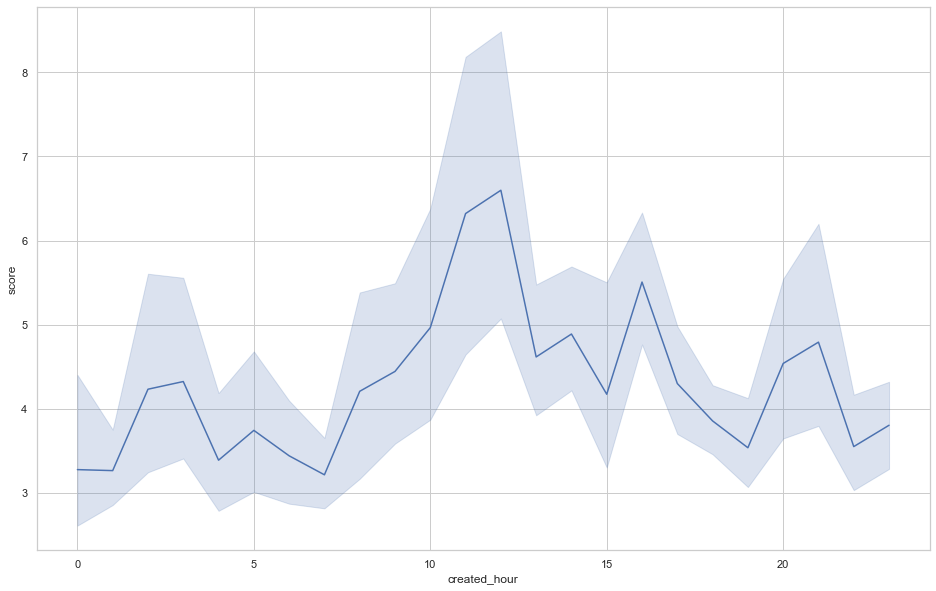

In [39]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Days vs score on Comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

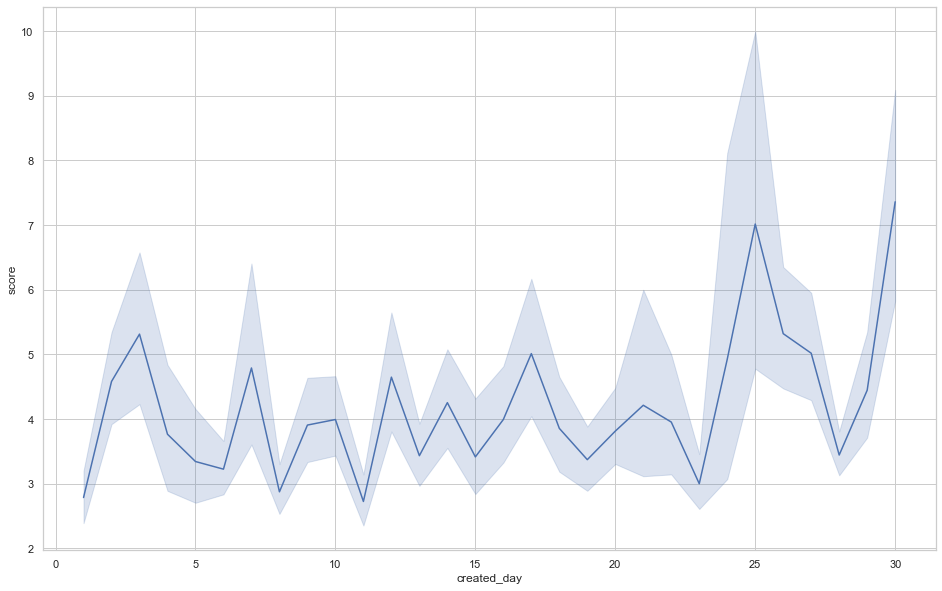

In [40]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

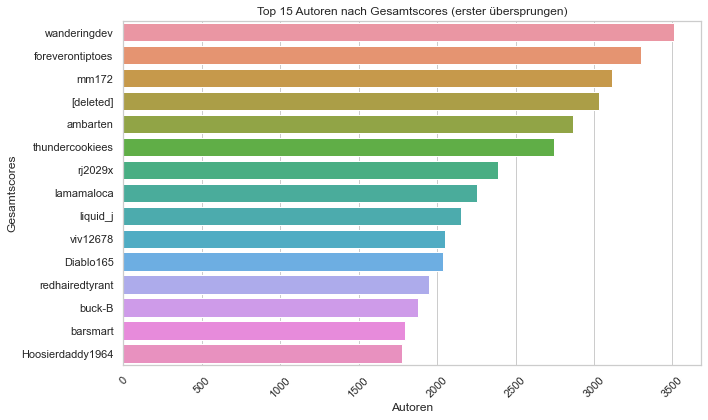

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[:15]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

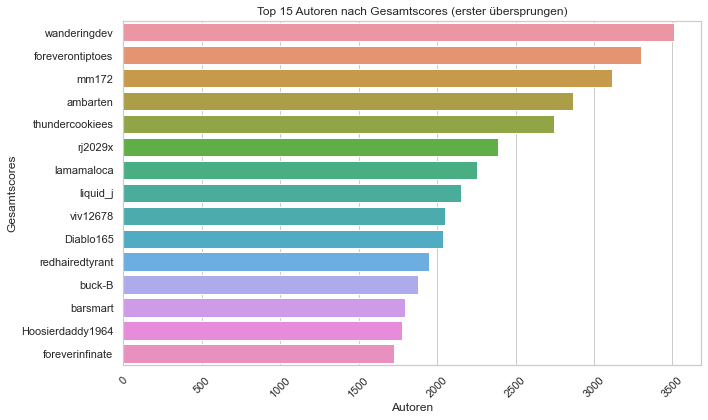

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den Autor "[deleted]" aus der sortierten Liste entfernen
sorted_authors = sorted_authors[sorted_authors.index != "[deleted]"]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Autoren')
plt.ylabel('Gesamtscores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [43]:
df.describe()

,author_flair_text,gilded,score,created_hour,created_day,created_year,comment_len
count,61822.0,61822.000000,61822.000000,61822.000000,61822.000000,61822.0,61822.000000
mean,0.0,0.000081,4.226683,12.747582,15.653408,2017.0,67.946572
std,0.0,0.008993,23.787632,7.279891,8.782465,0.0,79.864196
min,0.0,0.000000,-190.000000,0.000000,1.000000,2017.0,1.000000
25%,0.0,0.000000,1.000000,6.000000,8.000000,2017.0,19.000000
50%,0.0,0.000000,1.000000,15.000000,16.000000,2017.0,43.000000
75%,0.0,0.000000,3.000000,19.000000,23.000000,2017.0,88.000000
max,0.0,1.000000,1878.000000,23.000000,30.000000,2017.0,1672.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61822 entries, 0 to 61878
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             61822 non-null  object
 1   author_flair_text  61822 non-null  int64 
 2   body               61822 non-null  object
 3   controversiality   61822 non-null  bool  
 4   created_utc        61822 non-null  object
 5   distinguished      61822 non-null  object
 6   edited             61822 non-null  bool  
 7   gilded             61822 non-null  int64 
 8   id                 61822 non-null  object
 9   link_id            61822 non-null  object
 10  parent_id          61822 non-null  object
 11  score              61822 non-null  int64 
 12  stickied           61822 non-null  bool  
 13  created_hour       61822 non-null  int64 
 14  created_day        61822 non-null  int64 
 15  created_year       61822 non-null  int64 
 16  clean_text         61822 non-null  objec

# Save cleaned general data

In [45]:
df.to_csv("relationship_advise_17_comments_EDA_clean.csv",index=False,sep=";")

In [46]:
import pandas as pd
df_new=pd.read_csv("relationship_advise_17_comments_EDA_clean.csv",sep=";")

In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61822 entries, 0 to 61821
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   author             61822 non-null  object
 1   author_flair_text  61822 non-null  int64 
 2   body               61822 non-null  object
 3   controversiality   61822 non-null  bool  
 4   created_utc        61822 non-null  object
 5   distinguished      61822 non-null  object
 6   edited             61822 non-null  bool  
 7   gilded             61822 non-null  int64 
 8   id                 61822 non-null  object
 9   link_id            61822 non-null  object
 10  parent_id          61822 non-null  object
 11  score              61822 non-null  int64 
 12  stickied           61822 non-null  bool  
 13  created_hour       61822 non-null  int64 
 14  created_day        61822 non-null  int64 
 15  created_year       61822 non-null  int64 
 16  clean_text         61822 non-null  objec

False    61818
True         4
Name: stickied, dtype: int64


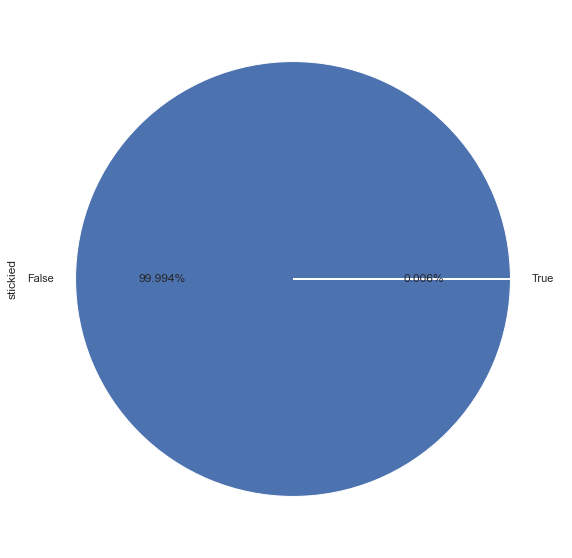

In [48]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df_new["stickied"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(df_new["stickied"].value_counts())